In [173]:
import os
from os import listdir
from os.path import isdir, join
import numpy as np
mypath = '/nfs/masi/lyui/VBI/CASCIO_CM/'
h = []
ct = []
lgi = []
sci =[]
s = []
sd = []
for root, dirs, files in os.walk(mypath):
    dirs.sort()
    for file in files:
        if file.endswith('lh.mid.reg.H.txt'):
            h.append(join(root, file))
        elif file.endswith('lh.mid.reg.CT.txt'):
            ct.append(join(root, file))
        elif file.endswith('lh.mid.reg.LGI.txt'):
            lgi.append(join(root, file))
        elif file.endswith('lh.mid.reg.SCI.txt'):
            sci.append(join(root, file))
        elif file.endswith('lh.mid.reg.S.txt'):
            s.append(join(root, file))
        elif file.endswith('lh.mid.reg.SD.txt'):
            sd.append(join(root, file))

In [283]:
print(len(h))

336


In [219]:
list = [h, ct, lgi, sci, s, sd]
for i in range(len(list)):
    if len(list[i]) != 336:
        print("oops")
list[1][1].split("-x-")

['/nfs/masi/lyui/VBI/CASCIO_CM/CASCIO_CM',
 '127642',
 '127642',
 'surf_quant_stat_v1',
 'bc38a014-6517-4446-99b7-b297ec2c2ca7',
 'Reg/lh.mid.reg.CT.txt']

# Print file names in matlab
string = ""
cnt = 0
f = open('/home/haol/Python Script/commands.txt', "w+")
for i in range(len(list)):
    for j in range(len(h)):
        cnt+=1
        string = "/fs4/masi/haol/SurfRemesh -t /fs4/masi/haol/input_mesh_files/sphere_327680.vtk -r /fs4/masi/haol/input_mesh_files/icosphere_7.vtk --outputProperty {} --noheader -p {} &"
        fileNumber = list[i][j].split("-x-")
        f.write(string.format("/fs4/masi/haol/data/"+fileNumber[2],list[i][j])+"\n")
        if cnt%18 == 0:
            f.write("wait" + "\n")
f.close()

In [388]:
import pandas as pd
label = pd.read_csv('/home/haol/Python Script/table.csv')['dx_group'].values
len(label)

221

In [174]:
table = pd.read_csv('/home/haol/Python Script/table.csv')
tab = table['xnat_session_number_Subject'].values
table['xnat_session_number_Subject'][217] = '229074'
table['xnat_session_number_Subject'][218] = '229106'
table['xnat_session_number_Subject'][220] = '233853'

NameError: name 'pd' is not defined

In [175]:
data_dir = "/fs4/masi/haol/data/"
file = []
f= open("/fs4/masi/haol/data/H.txt","w+")
good = ['1065', '1078','1065','1384','1491','1506','1511','1652','1691','782','863','894', '232708b']
for filename in sorted(os.listdir(data_dir)):
    if filename.endswith('.H.txt') and not filename.endswith('lh.mid.reg.H.txt'):
        a = filename.replace('.H.txt', '')
        if a in tab or a in good:
            file.append(join(data_dir, filename))
            f.write(join(data_dir, filename)+'\n')
f.close()

NameError: name 'tab' is not defined

In [351]:
a = table['Session'].values
len(set(a))

221

In [176]:
with open('/fs4/masi/haol/data/H.txt') as f:  
    dir = f.readlines()
data_dir = [w.replace('\n', '') for w in dir]

In [268]:
H_ = np.array([])
for i in range(len(data_dir)):
    H_ = np.concatenate([H_,np.loadtxt(fname = data_dir[i])]) 
np.shape(H_)

(42762762,)

In [355]:
#a = np.loadtxt(fname = data_dir[1])
H_[1:5, 2:4]
H_.dtype

dtype('float64')

# Make matrices
CT = np.array([])
for i in range(0, len(ct)):
    CT = np.concatenate([CT,np.loadtxt(fname = ct[i])])  

LGI = np.array([])
for i in range(0, len(lgi)):
    LGI = np.concatenate([LGI,np.loadtxt(fname = lgi[i])])  

SCI = np.array([])
for i in range(0, len(sci)):
    SCI = np.concatenate([SCI,np.loadtxt(fname = sci[i])]) 

S = np.array([])
for i in range(0, len(s)):
    S = np.concatenate([S,np.loadtxt(fname = s[i])])  

SD = np.array([])
for i in range(0, len(sd)):
    SD = np.concatenate([SD,np.loadtxt(fname = sd[i])])

In [244]:
for i in range(len(h)):
    if np.shape(np.loadtxt(fname = h[i])) != (163842,):
        print(i)
a=np.loadtxt(fname = h[2])
np.shape(a)
#np.shape(np.reshape(H,163824,-1))
#np.shape(CT)

(163842,)

In [281]:
H_ = np.reshape(H_, (-1,163842))
np.shape(H_)
H[:, :]

(261, 163842)

#hm= open("/fs4/masi/haol/data/Hmat.txt","w+")
np.savetxt("/fs4/masi/haol/data/Hmat.txt", H_)

In [378]:
'233853' in b

True

In [331]:
filename = '233853.H.txt'
a = filename.replace('.H.txt', '')
if a in b:
    print('Yay')

Yay


In [214]:
a = [[2,3],[2,4]]
a
np.shape(a)
#np.shape(np.expand_dims(a,1))
a[1][1]

4

In [367]:
H_= H_.astype(np.float32)
H_.dtype

dtype('float32')

In [377]:
import re

def atoi(text):
    return int(text) if text.isdigit() else text

def natural_keys(text):
    return [ atoi(c) for c in re.split(r'(\d+)', text) ]

file.sort(key=natural_keys)

In [374]:
data_dir = "/fs4/masi/haol/data/"
f= open("/fs4/masi/haol/data/H.txt","w+")
for filename in file:
            f.write(join(data_dir, filename)+'\n')
f.close()

# Training, testing, and validation data selection (**)
import random
CT_train = CT["Session"].values 
random.shuffle(CT_train)
a = random.choices(CT_train, k=45)
ASD_train = ASD["Session"].values 
random.shuffle(ASD_train)
b = random.choices(ASD_train, k=42)

In [852]:
tb = pd.read_csv('/home/haol/Python Script/updated_table.csv')
CT = tb[tb['dx_group']==0]
ASD = tb[tb['dx_group']==1]
tb['Session']=tb['Session'].values.astype(np.int64)
print("CT:"+str(len(CT)) + " " + "ASD:"+str(len(ASD)))

CT:145 ASD:111


In [701]:
CT_train = CT["Session"].values
CT_train.sort()
CT_train = CT_train[:119]
ASD_train = ASD["Session"].values 
ASD_train.sort()
ASD_train = ASD_train[:90]
len(CT_train)

119

In [177]:
## Shuffled lists
newT = pd.DataFrame(data=CT_train,columns=['Session'])  
newT['dx_group'] = CT["dx_group"].values[:119]
newT2 = pd.DataFrame(data=ASD_train, columns=['Session'])  
newT2['dx_group'] = ASD["dx_group"].values[:90]
frames = [newT, newT2]
T = pd.concat(frames, ignore_index=True)
T = T.sample(frac=1).reset_index(drop=True) # output T to csv file and print out the session number as path into a txt file named as 'Htrain.txt'
trainfile = T['Session'].values.astype(str)

NameError: name 'pd' is not defined

In [709]:
data_dir = "/fs4/masi/haol/data/"
f= open("/fs4/masi/haol/data/LGItrain.txt","w+")
for filename in trainfile:
            f.write(join(data_dir, filename) + '.LGI.txt'+'\n')
f.close()
T.to_csv ('/home/haol/Python Script/LGItraintable.csv', index = None, header=True)

In [178]:
CT_test = CT["Session"].values
CT_test.sort()
CT_test = CT_test[119:134]
ASD_test = ASD["Session"].values 
ASD_test.sort()
ASD_test = ASD_test[90:102]
newTest = pd.DataFrame(data=CT_test,columns=['Session'])  
newTest['dx_group'] = CT["dx_group"].values[:15]
newTest2 = pd.DataFrame(data=ASD_test, columns=['Session'])  
newTest2['dx_group'] = ASD["dx_group"].values[:12]
frames = [newTest, newTest2]
Test = pd.concat(frames, ignore_index=True)
Test = Test.sample(frac=1).reset_index(drop=True) # output T to csv file and print out the session number as path into a txt file named as 'Htrain.txt'
testfile = Test['Session'].values.astype(str)

NameError: name 'CT' is not defined

In [724]:
data_dir = "/fs4/masi/haol/data/"
f= open("/fs4/masi/haol/data/SCItest.txt","w+")
for filename in testfile:
            f.write(join(data_dir, filename) + '.SCI.txt'+'\n')
f.close()
Test.to_csv ('/home/haol/Python Script/SCItesttable.csv', index = None, header=True)

In [179]:
CT_vad = CT["Session"].values
CT_vad.sort()
CT_vad = CT_vad[134:]
ASD_vad = ASD["Session"].values 
ASD_vad.sort()
ASD_vad = ASD_vad[102:]
newvad = pd.DataFrame(data=CT_vad,columns=['Session'])  
newvad['dx_group'] = CT["dx_group"].values[:15]
newvad2 = pd.DataFrame(data=ASD_vad, columns=['Session'])  
newvad2['dx_group'] = ASD["dx_group"].values[:11]
frames = [newvad, newvad2]
Vad = pd.concat(frames, ignore_index=True)
Vad = Vad.sample(frac=1).reset_index(drop=True) # output T to csv file and print out the session number as path into a txt file named as 'Htrain.txt'
vadfile = Vad['Session'].values.astype(str)

NameError: name 'CT' is not defined

In [731]:
data_dir = "/fs4/masi/haol/data/"
f= open("/fs4/masi/haol/data/CTvalidation.txt","w+")
for filename in vadfile:
            f.write(join(data_dir, filename) + '.CT.txt'+'\n')
f.close()
Vad.to_csv ('/home/haol/Python Script/CTvalidationtable.csv', index = None, header=True)

## Matrix Dimension Testing

In [1011]:
DDD=[[[9]*5]*2]*3

In [1010]:
a = [1, 2, 3, 4, 5]
b = [6, 7, 8, 9, 10]
c = [11, 12, 13, 14, 15]
DDD = np.concatenate((a,b,c))
DDD = np.reshape(DDD,(3, -1))
#print(DDD)
#print(DDD[:3, :2])
#DDD.T[:3, :2]

In [ ]:
import torch 
output = torch.tensor(
  [
      [3, 1, 0],
      [3, 7, 2],
      [3, 8, 9],
      [7, 6, 4],
      [2, 7, 5],
      [6, 6, 8]
  ]
)
output.max(1, keepdim=True)[0]

## Filtering files for remashing

In [805]:
with open('//home/haol/Python Script/commands.txt') as f:  
    com = f.readlines()
uniNum = []
k = []
cnt = 0
for i in range(len(com)):
    if com[i] != 'wait\n':
        cnt += 1
        k = com[i].split("-x-")
        if cnt % 6 == 0:
            uniNum.append(k[2])

str

uniNum[219] = ''
uniNum.pop(219)

if tb['Session'].values.astype(int)[i] in uni:
        print(tb['Session'].values.astype(int)[i])
        continue 
    else:
        missing.append(str(tb['Session'].values.astype(int)[i]))

In [838]:
uni = [int(i) for i in uniNum]
missing = []
for i in range(len(uni)):
    if tb['Session'].values.astype(int)[i] not in uni:
        missing.append(tb['Session'].values.astype(int)[i])
len(missing)
#missing 

42

In [846]:
name = []

for i in range(len(missing)):
    name.extend(tb[tb['Session'] ==  missing[i]]['Assessor'].values)

In [850]:
mi = pd.DataFrame(data=missing,columns=['Session'])  
mi['Assessor'] = name
mi.to_csv ('/home/haol/Python Script/missing_session.csv', index = None, header=True)

# Make ROC

In [18]:
import pandas as pd
tb = pd.read_csv('/home/haol/Python Script/updated_table.csv')
frames = []
#CT = CT.sample(frac=1).reset_index(drop=True)
#ASD = ASD.sample(frac=1).reset_index(drop=True)
for i in range(10):
    newTest = pd.DataFrame(data=CT[14*i:14*(i+1)],columns=['Session'])  
    newTest['dx_group'] = CT["dx_group"].values[:14]
    newTest2 = pd.DataFrame(data=ASD[11*i:11*(i+1)], columns=['Session'])  
    newTest2['dx_group'] = ASD["dx_group"].values[:11]
    frames.append([newTest, newTest2])

NameError: name 'CT' is not defined

In [954]:
newTest = pd.DataFrame(data=CT[140:],columns=['Session'])  
newTest['dx_group'] = CT["dx_group"].values[:5]
newTest2 = pd.DataFrame(data=ASD[110:], columns=['Session'])  
newTest2['dx_group'] = ASD["dx_group"].values[:1]
frames.append([newTest, newTest2])

In [955]:
Table = []
for i in range(11):
    T2 = pd.concat(frames[i], ignore_index=True)
    #T2 = T2.sample(frac=1).reset_index(drop=True)
    Table.append(T2)

In [956]:
ShuffledT = pd.concat(Table, ignore_index=True)
Train = ShuffledT[:205]
Test = ShuffledT[205:230]
Valid = ShuffledT[230:]
trainfile = Train['Session'].values.astype(str)
testfile = Test['Session'].values.astype(str)
validfile = Valid['Session'].values.astype(str)

In [973]:
data_dir = "/fs4/masi/haol/data/"
f= open("/fs4/masi/haol/data/CV3/CTtrain.txt","w+")
for filename in trainfile:
            f.write(join(data_dir, filename) + '.CT.txt'+'\n')
f.close()
Train.to_csv ('/home/haol/Python Script/CV3/CTtraintable.csv', index = None, header=True)

In [974]:
data_dir = "/fs4/masi/haol/data/"
f= open("/fs4/masi/haol/data/CV3/CTtest.txt","w+")
for filename in testfile:
            f.write(join(data_dir, filename) + '.CT.txt'+'\n')
f.close()
Test.to_csv ('/home/haol/Python Script/CV3/CTtesttable.csv', index = None, header=True)

In [975]:
data_dir = "/fs4/masi/haol/data/"
f= open("/fs4/masi/haol/data/CV3/CTvalidation.txt","w+")
for filename in validfile:
            f.write(join(data_dir, filename) + '.CT.txt'+'\n')
f.close()
Valid.to_csv ('/home/haol/Python Script/CV3/CTvalidationtable.csv', index = None, header=True)

## Better_Loader

In [8]:
import pandas as pd
tb = pd.read_csv('/home/haol/Python_Script/updated_table.csv')
TD = tb[tb['dx_group']==0][:111]
ASD = tb[tb['dx_group']==1]
TD = TD.sample(frac=1).reset_index(drop=True)
ASD = ASD.sample(frac=1).reset_index(drop=True)

In [9]:
print(str(len(ASD)) +" "+ str(len(TD)))

111 111


In [10]:
k = 6
S_ASD = int(len(ASD)/k)
S_TD = int(len(TD)/k)

In [11]:
import numpy as np
P_ASD = []
P_TD = []
for i in range(k+1):
    P_ASD.append(i*S_ASD)
    P_TD.append(i*S_TD)
#P_TD
P_ASD
#P_TD

[0, 18, 36, 54, 72, 90, 108]

In [12]:
#P_ASD[-1] = 111
P_ASD
CV = 0
P_TD

[0, 18, 36, 54, 72, 90, 108]

In [13]:
def k_folds(CV,TD,ASD,size_v=1,size_t=1):
    frames = []
    frames2 = []
    frames3 = []
    for i in range(k-size_v-size_t):
        idx1 = (CV+i)%k
        idx2 = idx1+1
        a = ASD.loc[range(P_ASD[idx1],P_ASD[idx2])]
        b = TD.loc[range(P_TD[idx1],P_TD[idx2])]
        frames.append(a)
        frames.append(b)
    train = pd.concat(frames, ignore_index=False)
    for i in range(size_t):
        idx3 = (idx2+i)%k
        idx4 = idx3+1
        c = ASD.loc[range(P_ASD[idx3],P_ASD[idx4])]
        d = TD.loc[range(P_TD[idx3],P_TD[idx4])]
        frames2.append(c)
        frames2.append(d)
    test = pd.concat(frames2, ignore_index=False)
    for i in range(size_v):
        idx5 = (idx4+i)%k
        idx6 = idx5+1
        e = ASD.loc[range(P_ASD[idx5],P_ASD[idx6])]
        f = TD.loc[range(P_TD[idx5],P_TD[idx6])]
        frames3.append(e)
        frames3.append(f)
    valid = pd.concat(frames3, ignore_index=False)
    return train, test, valid

In [14]:
train, test, valid = k_folds(0, TD, ASD)
# trainfile = train['Session'].values.astype(str)
# testfile = test['Session'].values.astype(str)
# validfile = valid['Session'].values.astype(str)

from os.path import isdir, join
data_dir = "/fs4/masi/haol/data/"
f= open("/fs4/masi/haol/data/CV6/CTtrain.txt","w+")
for filename in trainfile:
            f.write(join(data_dir, filename) + '.CT.txt'+'\n')
f.close()
train.to_csv ('/home/haol/Python Script/CV6/CTtraintable.csv', index = None, header=True)
g= open("/fs4/masi/haol/data/CV6/CTtest.txt","w+")
for filename in testfile:
            g.write(join(data_dir, filename) + '.CT.txt'+'\n')
g.close()
test.to_csv ('/home/haol/Python Script/CV6/CTtesttable.csv', index = None, header=True)
h= open("/fs4/masi/haol/data/CV6/CTvalidation.txt","w+")
for filename in validfile:
            h.write(join(data_dir, filename) + '.CT.txt'+'\n')
h.close()
valid.to_csv ('/home/haol/Python Script/CV6/CTvalidationtable.csv', index = None, header=True)

lst = []
def r():
    a = 22
    b = 33
    c = 55
    return a,b,c
for i in range(3):
    lst.append(r())
print(lst)
lst[0][1]
lst[0][0]

In [276]:
a=[[[1],[2],[3]]]
a.append([[4],[5],[6]])
a.append([[7],[8],[9]])
np.shape(a) #(2,3,1)
# a[0][0][0] = 3
# a[0][2][0] = 4
# a[0][3][0] = 5
# a[0][1][0] = 6
# #a[0][1][3] = 4
#a[0][1][4] = 5
a[2][:2]
#len(a[0])

[[7], [8]]

In [285]:
k = []
for i in range(len(a[0])):
    k.extend(a[i][:2])
k

[[1], [2], [4], [5], [7], [8]]

In [315]:
data_dir = ['/fs4/masi/haol/data/7038.lh.CT.txt','/fs4/masi/haol/data/7039.lh.CT.txt',]
x = [None]*2
# for i in range(163824):
#     x[i] = i
for i in range(2):
    x[i] = np.loadtxt(fname = data_dir[i])
x = np.reshape(x, (-1, 163842))
np.shape(x)
x

array([[2.78554 , 3.938169, 3.010417, ..., 1.950052, 3.960628, 3.586583],
       [4.561488, 3.683042, 2.009675, ..., 1.88325 , 2.784101, 2.330043]])

In [316]:
data_dir = ['/fs4/masi/haol/data/7038.lh.CT.txt','/fs4/masi/haol/data/7039.lh.CT.txt',]
H_ = np.array([])
for i in range(2):
    H_ = np.concatenate([H_,np.loadtxt(fname = data_dir[i])]) 
np.shape(H_)
H_ = np.reshape(H_, (-1, 163842))
H_
#np.shape(H_)

array([[2.78554 , 3.938169, 3.010417, ..., 1.950052, 3.960628, 3.586583],
       [4.561488, 3.683042, 2.009675, ..., 1.88325 , 2.784101, 2.330043]])

In [350]:
a = valid.replace({'Scan': 'Improved 3D'}, 1)
a = a.replace({'Scan': 'Improved 3D SENSE'}, 2)
a = a.replace({'Scan': 'T1W'}, 3)
a = a.replace({'Scan': 'T1W/3D/TFE'}, 4)
a['Scan'].values.astype(np.int64)

array([1, 4, 1, 3, 4, 1, 2, 1, 1, 1, 2, 2, 3, 2, 3, 2, 1, 3, 3, 4, 2, 1,
       4, 3, 3, 3, 2, 4, 4, 1, 1, 4, 1, 1, 2, 2])

In [366]:
wal = pd.read_csv('/nfs/masi/lyui/WALLACE/demo_wallace_full.csv')
wal.rename(columns={'phi_dxgroup':'dx_group'}, inplace=True)
k = pd.concat([tb, wal], ignore_index=False)
a = wal['Session'].values

In [376]:
cnt = 0
for i in a:
     if i in [222, 236972]:
        cnt +=1
        print(i)
print(cnt)    

236972
1


In [77]:
    def mask(file, st):
        mask1_name = '/nfs/masi/lyui/Template/lh.parc.lobe.txt'
        mask2_name = '/nfs/masi/lyui/Template/rh.parc.lobe.txt'
        mask_file = open('/home/haol/Python_Script/mask1.txt', 'w+')
        if st == 'lh':
            with open(mask1_name) as mask1, open(file) as ref_file:
                for num, coord in zip(mask1, ref_file):
                    if str(num) != str('5' + '\n'):
                        mask_file.write("0" + '\n')
                    else:
                        mask_file.write(coord)
        else:
            with open(mask2_name) as mask2, open(file) as ref_file:
                for num, coord in zip(mask2, ref_file):
                    #print(coord)
                    if coord == str('3.989144' + '\n'):
                        print('YES')
                    if str(num) != str('5' + '\n'):
                        mask_file.write("0" + '\n')
                    else:
                        mask_file.write(coord)

In [78]:
mask('/fs4/masi/haol/data/782.rh.CT.txt', 'rh')

YES


In [41]:
print(type(str(1)))

<class 'str'>


In [106]:
import numpy as np
a=[[1,2,3,1]]
a.append([4,5,6,2])
a.append([7,8,9,3])
a = np.reshape(a, (-1, 4))
a[:,0] = 0
len(a[1])

4

In [112]:
fname = [[1,2,3,4], [5,6,7,8], [9,10,11,12]]
subj = fname[1]
subj

[5, 6, 7, 8]

In [110]:
subj[0]

5

In [130]:
a = np.array([0, 1, 2, 3 ,4 ,5])
b = np.tile(a, (10,1)).T
#c = b.T
#print(c.shape)
b

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
       [3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [4, 4, 4, 4, 4, 4, 4, 4, 4, 4],
       [5, 5, 5, 5, 5, 5, 5, 5, 5, 5]])

In [129]:
c = np.expand_dims(c, 1)
c.shape

(6, 1, 10)

In [1]:
a = [1,2,3,4,5,6,7,8,9]
k = a[:2] + a[4:]
k

[1, 2, 5, 6, 7, 8, 9]

In [102]:
from matplotlib import pyplot as plt
import numpy as np
x = np.arange(1,81)
Train_loss_naive = [0.42283494770526886, 0.29225723445415497, 0.18555449694395065, 0.09689004098375638, 0.07932714372873306, 0.0797108660141627, 0.07748635361591975, 0.07407063369949658, 0.07201363270481427, 0.07061036924521129, 0.0697214479247729, 0.0690072091917197, 0.06837881604830424, 0.06773930415511131, 0.0670490028957526, 0.06644795959194501, 0.0658481518427531, 0.0650211280832688, 0.06425668050845464, 0.06398721970617771, 0.06301827542483807, 0.06227755546569824, 0.0617164745926857, 0.061090746273597084, 0.06044134311378002, 0.0598498440037171, 0.05909513061245283, 0.05854026476542155, 0.05744527901212374, 0.056628104920188584, 0.055807329093416534, 0.05490569521983465, 0.054386954133709274, 0.053909437730908394, 0.05348892447849115, 0.0524192750453949, 0.051650008807579674, 0.05088113434612751, 0.05009468582769235, 0.04872353312869867, 0.04737098080416521, 0.04584923076132933, 0.04434583522379398, 0.04287992293636004, 0.04057456242541472, 0.038439188773433365, 0.037157408272226654, 0.03344185029466947, 0.03131600686659416, 0.030104223328332107, 0.029148762735227745, 0.028091203110913437, 0.027013601114352543, 0.026070362888276577, 0.02537570148706436, 0.024784207964936893, 0.02415395186593135, 0.02341634500771761, 0.02264629676938057, 0.022149984103937943, 0.021823141102989514, 0.021254767042895157, 0.020792802485326927, 0.020358105500539143, 0.019777853041887283, 0.019460642089446385, 0.01928398571908474, 0.018887327363093693, 0.018471329162518185, 0.018096033794184525, 0.018011259535948437, 0.017886665028830368, 0.017880549654364586, 0.017513382869462173, 0.016826822112003963, 0.01646474562585354, 0.016226200697322685, 0.01564308349043131, 0.015383438051988682, 0.017271173031379778]
Test_loss_naive = [0.4658397436141968, 0.297199825445811, 0.17755315701166788, 0.11608769496281941, 0.11221330364545186, 0.11297897497812907, 0.10841601093610127, 0.10424305001894633, 0.10063703854878743, 0.09794265031814575, 0.09702619910240173, 0.0959688127040863, 0.09471278389294942, 0.09372559189796448, 0.09306372205416362, 0.09187272191047668, 0.09116753935813904, 0.0902174711227417, 0.08975292245546977, 0.08893901109695435, 0.08787214756011963, 0.08717981974283855, 0.08623719215393066, 0.08497401078542073, 0.08435836434364319, 0.08349816004435222, 0.0828729122877121, 0.08168862263361613, 0.08075680832068126, 0.07965928812821706, 0.07918659349282582, 0.07710328698158264, 0.07629310588041942, 0.07611701885859172, 0.07511491080125172, 0.07338870068391164, 0.07279378672440846, 0.07182226578394572, 0.07086699704329173, 0.06987406810124715, 0.068015918135643, 0.06692418952782948, 0.0669511506954829, 0.06657368938128154, 0.07897604008515675, 0.07548358539740245, 0.09749075770378113, 0.10809163252512614, 0.08559512098630269, 0.08111830055713654, 0.05979868769645691, 0.058262795209884644, 0.04942987859249115, 0.048880343635876976, 0.04966722925504049, 0.05546501775582632, 0.05131362875302633, 0.04912626246611277, 0.04739031692345937, 0.04743834833304087, 0.042011454701423645, 0.042539690931638084, 0.04163648933172226, 0.042300899823506675, 0.042391255497932434, 0.040024466812610626, 0.03984860082467397, 0.03938657542069753, 0.041077516973018646, 0.05154786010583242, 0.041585793097813926, 0.043161988258361816, 0.041489591201146446, 0.04020433376232783, 0.04075067241986593, 0.04011486222346624, 0.04215741157531738, 0.039372675120830536, 0.041601491471131645, 0.05109731356302897]
# plt.plot(x, Train_loss_naive,label='Train loss')
# plt.plot(x, Test_loss_naive,label='Validation loss')
# plt.legend()
# plt.show()

In [8]:
min(Train_loss_naive)

0.015383438051988682

In [103]:
Train = [2.4, 2.374420404434204, 1.6472524801890056, 0.8854313890139262,0.6413580477237701, 0.6339725852012634, 0.6166760325431824, 0.5890750388304392, 0.5733896891276041, 0.5657490988572439, 0.5576075514157613, 0.5509803593158722, 0.5441908737023672, 0.5392859677473704, 0.532370368639628, 0.5262479384740194, 0.5216768085956573, 0.515220711628596, 0.5093607852856318, 0.5035770883162817, 0.49988414843877155, 0.4950186312198639, 0.489179198940595, 0.4888711671034495, 0.4800197184085846, 0.469012384613355, 0.4554515480995178, 0.4378089557091395, 0.4176286260286967, 0.39304782450199127, 0.3624063382546107, 0.33802322049935657, 0.3276247481505076, 0.31407726804415387, 0.3028372873862584, 0.289599080880483, 0.28582580884297687, 0.27640625337759656, 0.26718904574712116, 0.2564948449532191, 0.25335797170797986, 0.24548093974590302, 0.24081815282503763, 0.2322999710838, 0.22546530266602835, 0.22019769748051962, 0.21546159933010736, 0.20965131868918738, 0.20621120929718018, 0.19973058998584747, 0.19590476900339127, 0.19350002954403558, 0.18733056137959161, 0.18509483089049658, 0.18054144581158957, 0.1799016073346138, 0.17828240245580673, 0.17574643592039743, 0.16744577139616013, 0.16172406822443008, 0.1578896145025889, 0.15680884569883347, 0.15288413812716803, 0.14969278126955032, 0.1472556566198667, 0.1441683123509089, 0.14266707996527353, 0.14249703536430994, 0.13970666627089182, 0.13477709765235582, 0.13050977264841399, 0.1309757021566232, 0.12814111510912576, 0.1282342808942, 0.1273981382449468, 0.1267933969696363, 0.12360362336039543, 0.11946745589375496, 0.1155455894768238, 0.11238787571589152, 0.1104661797483762, 0.10942071800430615, 0.10845541084806125, 0.10620098188519478, 0.10338126868009567, 0.10189192369580269, 0.10051538422703743, 0.09903447329998016, 0.09604433178901672, 0.09528402735789616, 0.0951109491288662, 0.09385823582609494, 0.09285131345192592, 0.09033384049932162, 0.08745095878839493, 0.08661108464002609, 0.08252569039662679, 0.08266899362206459, 0.08133621513843536, 0.07971977815032005] 
Test = [2.4, 2.3109374046325684, 1.498519778251648, 0.7365546822547913,0.6764551401138306, 0.7209933400154114, 0.7045554518699646, 0.6653959155082703, 0.6354855895042419, 0.6182667016983032, 0.6127558946609497, 0.6042911410331726, 0.6013034582138062, 0.6006035208702087, 0.5938410758972168, 0.591026782989502, 0.5919926166534424, 0.58175128698349, 0.5784288048744202, 0.5722529292106628, 0.5691617727279663, 0.566552996635437, 0.563894510269165, 0.5604143142700195, 0.5525083541870117, 0.5428071618080139, 0.529716968536377, 0.5268296003341675, 0.5754360556602478, 0.5432155728340149, 0.585976779460907, 0.5338676571846008, 0.5102222561836243, 0.516812264919281, 0.49978387355804443, 0.4679482579231262, 0.5317360162734985, 0.5052599310874939, 0.4558940529823303, 0.4363448917865753, 0.45135170221328735, 0.49561941623687744, 0.4443354308605194, 0.4202719032764435, 0.41350382566452026, 0.401265412569046, 0.3926524221897125, 0.38240060210227966, 0.3869097828865051, 0.4077468812465668, 0.4361560046672821, 0.4142942726612091, 0.38547614216804504, 0.40092307329177856, 0.40422606468200684, 0.4133705794811249, 0.4730129539966583, 0.44261714816093445, 0.3825824558734894, 0.3750641345977783, 0.39536136388778687, 0.40099188685417175, 0.4058939814567566, 0.38148733973503113, 0.39695820212364197, 0.3847874104976654, 0.39083367586135864, 0.3917372524738312, 0.38146066665649414, 0.3749624192714691, 0.3905392587184906, 0.3669881820678711, 0.37886354327201843, 0.3873054087162018, 0.3989291489124298, 0.40663468837738037, 0.41067740321159363, 0.4090975522994995, 0.39003217220306396, 0.39903488755226135, 0.386506050825119, 0.3822856545448303, 0.3952942490577698, 0.41715362668037415, 0.3867187201976776, 0.39601409435272217, 0.38233110308647156, 0.39627236127853394, 0.39990559220314026, 0.3947199583053589, 0.399978369474411, 0.3926064074039459, 0.40468698740005493, 0.41805368661880493, 0.4238075315952301, 0.4225866198539734, 0.41396814584732056, 0.42852699756622314, 0.41389840841293335, 0.42051994800567627] 
# x = np.arange(1,101)
# plt.plot(x, Train,label='Train loss')
# plt.plot(x, Test,label='Validation loss')
# plt.legend()
# plt.show()
max_train = 3.4210221767425537
max_test = 2.72253155708313

In [101]:
T1 = [2.4, 2.3863173723220825, 1.630213439464569, 0.8579088250796, 0.6385002235571543, 0.6317453781763712, 0.6127915481726328, 0.5914179782072703, 0.5772024989128113, 0.5701017379760742, 0.5646467705567678, 0.5583423475424448, 0.5522914628187815, 0.5485940674940745, 0.5410461028416952, 0.5350163280963898, 0.527517835299174, 0.5197285215059916, 0.5130631029605865, 0.5043399731318156, 0.49327970544497174, 0.4826190570990245, 0.46534352501233417, 0.43747064967950183, 0.41420121987660724, 0.3730392207702001, 0.34658336639404297, 0.3266705224911372, 0.3096158305803935, 0.29347175856431323, 0.28149127463499707, 0.2721729824940364, 0.2624823749065399, 0.251846785346667, 0.24523000915845236, 0.2356175109744072, 0.23240388184785843, 0.22317943225304285, 0.21634449064731598, 0.20810323456923166, 0.2006008898218473, 0.1937244733174642, 0.18992044031620026, 0.18713742246230444, 0.18402227262655893, 0.18052051961421967, 0.1824112261335055, 0.1760973259806633, 0.1709799220164617, 0.164906936387221, 0.16119236995776495, 0.15707685550053915, 0.15238909174998602, 0.1476246565580368, 0.14646073430776596, 0.1409546509385109, 0.13556397085388502, 0.1348387971520424, 0.1352014827231566, 0.13317261512080827, 0.12920908257365227, 0.12524771193663278, 0.12057167415817578, 0.11737121020754178, 0.11541164790590604, 0.1118830218911171, 0.11147920911510785, 0.11017079651355743, 0.11074760307868321, 0.11411875734726588, 0.12034158532818158, 0.11600719764828682, 0.11377805223067601, 0.1118270494043827, 0.10438308119773865, 0.10081391036510468, 0.09788515915473302, 0.09319938222567241, 0.08976741507649422, 0.08850020542740822, 0.08829318359494209, 0.08823476607600848, 0.08795489619175594, 0.08838324621319771, 0.08483563115199406, 0.08254089330633481, 0.08129839226603508, 0.08068064724405606, 0.08057366559902827, 0.07854568709929784]
T2 = [2, 1.9489033222198486, 1.1946585178375244, 0.6772777438163757, 0.6225314736366272, 0.6209925413131714, 0.5971605181694031, 0.5762179493904114, 0.5646074414253235, 0.5573348999023438, 0.5535618662834167, 0.5483963489532471, 0.5446752309799194, 0.5427479147911072, 0.5359944701194763, 0.5291282534599304, 0.5228464603424072, 0.5151084065437317, 0.5094766020774841, 0.5036747455596924, 0.49507376551628113, 0.49017906188964844, 0.47417163848876953, 0.4677020013332367, 0.4263591170310974, 0.38709378242492676, 0.3962707221508026, 0.37958768010139465, 0.3461467921733856, 0.34383174777030945, 0.4318418800830841, 0.4272402226924896, 0.3348316550254822, 0.29491209983825684, 0.3291425406932831, 0.3358002007007599, 0.30209237337112427, 0.2895215153694153, 0.27697572112083435, 0.27476224303245544, 0.26620912551879883, 0.25569793581962585, 0.26199355721473694, 0.24829144775867462, 0.24890562891960144, 0.256925106048584, 0.23484544456005096, 0.24928370118141174, 0.2523071765899658, 0.2782260477542877, 0.2302119880914688, 0.22087214887142181, 0.2259976863861084, 0.222492054104805, 0.22254952788352966, 0.21470731496810913, 0.2235143929719925, 0.21348132193088531, 0.22842848300933838, 0.22213946282863617, 0.2174685150384903, 0.21406243741512299, 0.22937177121639252, 0.20726566016674042, 0.21626555919647217, 0.21737316250801086, 0.2241707295179367, 0.22084841132164001, 0.2220202386379242, 0.2495628148317337, 0.25558602809906006, 0.23847459256649017, 0.2676301598548889, 0.2563680410385132, 0.23557282984256744, 0.2375718355178833, 0.23840323090553284, 0.23965193331241608, 0.23485225439071655, 0.245221346616745, 0.2518472969532013, 0.2297564297914505, 0.23655998706817627, 0.24269133806228638, 0.2454424351453781, 0.2403799444437027, 0.24386176466941833, 0.2485349327325821, 0.24956917762756348, 0.2543382942676544]
# x = np.arange(1,91)
# plt.plot(x, T1,label='Train loss')
# plt.plot(x, T2,label='Validation loss')
# plt.legend()
# plt.show()
T1_max = 3.389313260714213
T2_max = 2.6750969886779785

In [137]:
# Naive loss
Train1 = [3.382679541905721, 2.337965726852417, 1.4841630260149639, 0.7752342720826467, 0.6344789663950602, 0.6373982230822245, 0.6193946997324625, 0.5920897821585337, 0.5755969285964966, 0.566518247127533, 0.5583556989828745, 0.5523501535256704, 0.5481865505377451, 0.5432418088118235, 0.5377366443475088, 0.5322088201840719, 0.527297705411911, 0.521533191204071, 0.5157725512981415, 0.5116470207770666, 0.5042081773281097, 0.498157595594724, 0.49402111768722534, 0.4886563966671626, 0.4852760583162308, 0.47954611480236053, 0.47218992312749225, 0.46642547349135083, 0.458063210050265, 0.451401228706042, 0.4440891941388448, 0.43750397364298504, 0.43207139273484546, 0.43231375018755597, 0.4254906227191289, 0.41761759916941327, 0.4128079315026601, 0.4078107525904973, 0.4020691116650899, 0.39649445315202075, 0.3904916097720464, 0.3836200137933095, 0.37532008687655133, 0.374770388007164, 0.37002139786879223, 0.3604567050933838, 0.35540638367335003, 0.34984151025613147, 0.3421291510264079, 0.3313456326723099, 0.3190387586752574, 0.29792362451553345, 0.2835785299539566, 0.286449874440829, 0.2679121990998586, 0.2531208097934723, 0.23829050858815512, 0.22690196832021078, 0.21768375486135483, 0.21013909578323364, 0.2030270571509997, 0.1958901509642601, 0.19085588306188583, 0.18537373592456183, 0.18048410365978876, 0.17693406840165457, 0.1717628687620163, 0.16822919249534607, 0.16799430549144745, 0.162716972331206, 0.15892829497655234, 0.1555966610709826, 0.15005123118559519, 0.14967845380306244, 0.1453823521733284, 0.1417220706741015, 0.13967927048603693, 0.1376884033282598, 0.13634498789906502, 0.1337224878370762, 0.13045310974121094, 0.1276213899254799, 0.12385288005073865, 0.12153669819235802, 0.1193666656812032, 0.11609473079442978, 0.11489045868317287, 0.11204768468936284, 0.10994124040007591, 0.11085480451583862, 0.10722773646314938, 0.10631875445445378, 0.10489651809136073, 0.10542736078302066, 0.1023205816745758, 0.10157087817788124, 0.10052281245589256, 0.09807846695184708, 0.0966311904291312, 0.09119408080975215]
Test1 = [2.795050859451294, 1.7809805870056152, 1.0660446882247925, 0.6985703706741333, 0.674189031124115, 0.6767309308052063, 0.6505065560340881, 0.6288612484931946, 0.6004787087440491, 0.5866400003433228, 0.5815969705581665, 0.5770859718322754, 0.5715509653091431, 0.56390380859375, 0.5576767921447754, 0.552948534488678, 0.5473610162734985, 0.5426110029220581, 0.5365247130393982, 0.5342199206352234, 0.5272493362426758, 0.5205453038215637, 0.5140772461891174, 0.5090653300285339, 0.5093379020690918, 0.5056359171867371, 0.49659764766693115, 0.48885494470596313, 0.4852302074432373, 0.4719659686088562, 0.4671570062637329, 0.46091946959495544, 0.4590909481048584, 0.46417921781539917, 0.44694045186042786, 0.4405607581138611, 0.4326220452785492, 0.42855533957481384, 0.4246680736541748, 0.42630767822265625, 0.41799822449684143, 0.4098874032497406, 0.40502282977104187, 0.4036608934402466, 0.3962603807449341, 0.39264875650405884, 0.38972604274749756, 0.38661742210388184, 0.3842185139656067, 0.445859432220459, 0.37529417872428894, 0.4545879364013672, 0.42308735847473145, 0.41071006655693054, 0.47601428627967834, 0.4338647127151489, 0.3676603138446808, 0.34944960474967957, 0.284528911113739, 0.27928176522254944, 0.31898975372314453, 0.29470446705818176, 0.2754580080509186, 0.2849200665950775, 0.25468340516090393, 0.24177977442741394, 0.24502041935920715, 0.257517546415329, 0.25721636414527893, 0.24665884673595428, 0.22061119973659515, 0.2225806564092636, 0.2471695989370346, 0.262043297290802, 0.22351355850696564, 0.2236558496952057, 0.27486512064933777, 0.2339676022529602, 0.23118679225444794, 0.22212785482406616, 0.21663597226142883, 0.22785837948322296, 0.21778836846351624, 0.21588441729545593, 0.21684615314006805, 0.22132451832294464, 0.22207875549793243, 0.21600303053855896, 0.23322410881519318, 0.21979308128356934, 0.21803422272205353, 0.21942918002605438, 0.22411099076271057, 0.22348687052726746, 0.20705534517765045, 0.21845699846744537, 0.20859253406524658, 0.23050375282764435, 0.21531294286251068, 0.22170951962471008]

# Naive2
Train2 = [3.4210221767425537, 2.374420404434204, 1.6472524801890056, 0.8854313890139262, 0.6413580477237701, 0.6339725852012634, 0.6166760325431824, 0.5890750388304392, 0.5733896891276041, 0.5657490988572439, 0.5576075514157613, 0.5509803593158722, 0.5441908737023672, 0.5392859677473704, 0.532370368639628, 0.5262479384740194, 0.5216768085956573, 0.515220711628596, 0.5093607852856318, 0.5035770883162817, 0.49988414843877155, 0.4950186312198639, 0.489179198940595, 0.4888711671034495, 0.4800197184085846, 0.469012384613355, 0.4554515480995178, 0.4378089557091395, 0.4176286260286967, 0.39304782450199127, 0.3624063382546107, 0.33802322049935657, 0.3276247481505076, 0.31407726804415387, 0.3028372873862584, 0.289599080880483, 0.28582580884297687, 0.27640625337759656, 0.26718904574712116, 0.2564948449532191, 0.25335797170797986, 0.24548093974590302, 0.24081815282503763, 0.2322999710838, 0.22546530266602835, 0.22019769748051962, 0.21546159933010736, 0.20965131868918738, 0.20621120929718018, 0.19973058998584747, 0.19590476900339127, 0.19350002954403558, 0.18733056137959161, 0.18509483089049658, 0.18054144581158957, 0.1799016073346138, 0.17828240245580673, 0.17574643592039743, 0.16744577139616013, 0.16172406822443008, 0.1578896145025889, 0.15680884569883347, 0.15288413812716803, 0.14969278126955032, 0.1472556566198667, 0.1441683123509089, 0.14266707996527353, 0.14249703536430994, 0.13970666627089182, 0.13477709765235582, 0.13050977264841399, 0.1309757021566232, 0.12814111510912576, 0.1282342808942, 0.1273981382449468, 0.1267933969696363, 0.12360362336039543, 0.11946745589375496, 0.1155455894768238, 0.11238787571589152, 0.1104661797483762, 0.10942071800430615, 0.10845541084806125, 0.10620098188519478, 0.10338126868009567, 0.10189192369580269, 0.10051538422703743, 0.09903447329998016, 0.09604433178901672, 0.09528402735789616, 0.0951109491288662, 0.09385823582609494, 0.09285131345192592, 0.09033384049932162, 0.08745095878839493, 0.08661108464002609, 0.08252569039662679, 0.08266899362206459, 0.08133621513843536, 0.07971977815032005]
Test2 = [2.72253155708313, 2.3109374046325684, 1.498519778251648, 0.7365546822547913, 0.6764551401138306, 0.7209933400154114, 0.7045554518699646, 0.6653959155082703, 0.6354855895042419, 0.6182667016983032, 0.6127558946609497, 0.6042911410331726, 0.6013034582138062, 0.6006035208702087, 0.5938410758972168, 0.591026782989502, 0.5919926166534424, 0.58175128698349, 0.5784288048744202, 0.5722529292106628, 0.5691617727279663, 0.566552996635437, 0.563894510269165, 0.5604143142700195, 0.5525083541870117, 0.5428071618080139, 0.529716968536377, 0.5268296003341675, 0.5754360556602478, 0.5432155728340149, 0.585976779460907, 0.5338676571846008, 0.5102222561836243, 0.516812264919281, 0.49978387355804443, 0.4679482579231262, 0.5317360162734985, 0.5052599310874939, 0.4558940529823303, 0.4363448917865753, 0.45135170221328735, 0.49561941623687744, 0.4443354308605194, 0.4202719032764435, 0.41350382566452026, 0.401265412569046, 0.3926524221897125, 0.38240060210227966, 0.3869097828865051, 0.4077468812465668, 0.4361560046672821, 0.4142942726612091, 0.38547614216804504, 0.40092307329177856, 0.40422606468200684, 0.4133705794811249, 0.4730129539966583, 0.44261714816093445, 0.3825824558734894, 0.3750641345977783, 0.39536136388778687, 0.40099188685417175, 0.4058939814567566, 0.38148733973503113, 0.39695820212364197, 0.3847874104976654, 0.39083367586135864, 0.3917372524738312, 0.38146066665649414, 0.3749624192714691, 0.3905392587184906, 0.3669881820678711, 0.37886354327201843, 0.3873054087162018, 0.3989291489124298, 0.40663468837738037, 0.41067740321159363, 0.4090975522994995, 0.39003217220306396, 0.39903488755226135, 0.386506050825119, 0.3822856545448303, 0.3952942490577698, 0.41715362668037415, 0.3867187201976776, 0.39601409435272217, 0.38233110308647156, 0.39627236127853394, 0.39990559220314026, 0.3947199583053589, 0.399978369474411, 0.3926064074039459, 0.40468698740005493, 0.41805368661880493, 0.4238075315952301, 0.4225866198539734, 0.41396814584732056, 0.42852699756622314, 0.41389840841293335, 0.42051994800567627]


# Naive3 loss
Train3 = [3.3893131415049234, 2.3863172928492227, 1.630216896533966, 0.8579122126102448, 0.6385201215744019, 0.6317967275778452, 0.6128103137016296, 0.5914312402407328, 0.5772018432617188, 0.5701165894667307, 0.5644517044226328, 0.5584898988405863, 0.5525999466578165, 0.5471063156922659, 0.5396898686885834, 0.5328620374202728, 0.5244003434975942, 0.513934592405955, 0.5040685186783472, 0.4927651385466258, 0.4806213279565175, 0.466428945461909, 0.44204872846603394, 0.41636961698532104, 0.3830426335334778, 0.3556283116340637, 0.3388107866048813, 0.3307854433854421, 0.31453052659829456, 0.3001798689365387, 0.28717368841171265, 0.2777848094701767, 0.2669290030996005, 0.2593159427245458, 0.25118571519851685, 0.24097727984189987, 0.23564874877532324, 0.22950575004021326, 0.22050293534994125, 0.21397357185681662, 0.20931644986073175, 0.20457245906194052, 0.19917541493972143, 0.19083562244971594, 0.1836277718345324, 0.17959214746952057, 0.17717304080724716, 0.17205172528823218, 0.16971768190463385, 0.16344050814708075, 0.15890431652466455, 0.15401633083820343, 0.1506180614233017, 0.14757756888866425, 0.14686970909436545, 0.14158494273821512, 0.13788824528455734, 0.13732028752565384, 0.13328519836068153, 0.12992620716492334, 0.12551613648732504, 0.12296928589542706, 0.12041019275784492, 0.11702303712566693, 0.11319993684689204, 0.11199040710926056, 0.11054159204165141, 0.10810106868545215, 0.10703608517845471, 0.10646551723281543, 0.10457607234517734, 0.10356292376915614, 0.10141780724128087, 0.10044639309247334, 0.09888940677046776, 0.09657671923438708, 0.09461456413070361, 0.09402793645858765, 0.09211968009670575, 0.08978797992070515, 0.08575893938541412, 0.0844881683588028, 0.08409867559870084, 0.08248592416445415, 0.08143978441754977, 0.07796783496936162, 0.07771081974109013, 0.07511586447556813, 0.07523254677653313, 0.07502776632706325, 0.07325675090154012, 0.07274345432718594, 0.07168105989694595, 0.0715680830180645, 0.07117685054739316, 0.07119647413492203, 0.07116515686114629, 0.07129254812995593, 0.06914176295200984, 0.06698061029116313]
Test3 = [2.6752521991729736, 1.9488009214401245, 1.1938647031784058, 0.677039384841919, 0.622577965259552, 0.6211526393890381, 0.5971710681915283, 0.5763658285140991, 0.5645073056221008, 0.5572795271873474, 0.5537929534912109, 0.5492011308670044, 0.5449026823043823, 0.5401521325111389, 0.5341653823852539, 0.5282610058784485, 0.5210368037223816, 0.5158833861351013, 0.5126545429229736, 0.4987872838973999, 0.4838810861110687, 0.48326680064201355, 0.45768317580223083, 0.44818657636642456, 0.419924795627594, 0.4112662374973297, 0.4639170169830322, 0.4275742173194885, 0.35544732213020325, 0.35680732131004333, 0.3367108702659607, 0.3359471261501312, 0.35183608531951904, 0.3455814719200134, 0.31902605295181274, 0.31634414196014404, 0.30502215027809143, 0.3390256464481354, 0.2920019030570984, 0.2983635365962982, 0.289166659116745, 0.2727726101875305, 0.2776225507259369, 0.2713724374771118, 0.2844386696815491, 0.2799135446548462, 0.2654019892215729, 0.2816888689994812, 0.2784699499607086, 0.2776188254356384, 0.270243376493454, 0.25744864344596863, 0.2524125874042511, 0.26363083720207214, 0.26258403062820435, 0.2577144205570221, 0.2747601270675659, 0.2547248899936676, 0.2577020823955536, 0.25615325570106506, 0.2585009038448334, 0.2504041790962219, 0.2473892867565155, 0.24837487936019897, 0.26686957478523254, 0.2602815628051758, 0.2570941150188446, 0.2655330002307892, 0.2741435170173645, 0.27433499693870544, 0.2672845721244812, 0.2595475912094116, 0.2601778209209442, 0.2552753686904907, 0.2615818679332733, 0.27024221420288086, 0.2690492868423462, 0.28510338068008423, 0.27276602387428284, 0.2718040347099304, 0.27194103598594666, 0.26656395196914673, 0.269243448972702, 0.2817324995994568, 0.27952486276626587, 0.28317347168922424, 0.29138919711112976, 0.2947348356246948, 0.2850525379180908, 0.29294854402542114, 0.2987053096294403, 0.298080712556839, 0.28716468811035156, 0.2924361526966095, 0.3013545274734497, 0.3036124110221863, 0.2964482605457306, 0.2971179783344269, 0.2946670949459076, 0.29854100942611694]

# Naive4 loss
Train4 = [3.4038990338643393, 2.378213047981262, 1.5712725520133972, 0.8347079853216807, 0.6482689479986826, 0.6426980992158254, 0.6234096686045328, 0.6027019421259562, 0.590782364209493, 0.5821951727072397, 0.575910896062851, 0.5704482893149058, 0.5662779410680135, 0.5591398378213247, 0.5530540843804678, 0.5477052927017212, 0.542439212401708, 0.5365423361460367, 0.5304722189903259, 0.5259801844755808, 0.5123289277156194, 0.5088670253753662, 0.4824723054965337, 0.4441889027754466, 0.4073605090379715, 0.37474306921164197, 0.35859574377536774, 0.3433950295050939, 0.3330825865268707, 0.32178671658039093, 0.31325632830460864, 0.3037518511215846, 0.29448359211285907, 0.28597591320673627, 0.28162774940331775, 0.27272846798102063, 0.26659394055604935, 0.2570369442303975, 0.2480979487299919, 0.24155213932196298, 0.23475335290034613, 0.22618565460046133, 0.21709154297908148, 0.21330538392066956, 0.21016288797060648, 0.2034300888578097, 0.20133760323127112, 0.19522953033447266, 0.19123521198829016, 0.18616573264201483, 0.18142888446648917, 0.1776470864812533, 0.17467240492502847, 0.1710133155186971, 0.16701178501049677, 0.16565565764904022, 0.16247368107239404, 0.15966306875149408, 0.15630633383989334, 0.1524490788578987, 0.14929875979820886, 0.1465516835451126, 0.14330977201461792, 0.14309853812058768, 0.14061435560385385, 0.13845190405845642, 0.13607199365894, 0.13549908250570297, 0.13228948911031088, 0.13073391715685526, 0.1286564220984777, 0.12611215313275656, 0.12528755888342857, 0.1260567493736744, 0.12401136755943298, 0.12114284311731656, 0.11995148782928784, 0.11658571784694989, 0.11473146080970764, 0.11331585670510928, 0.11053778106967609, 0.10870435958107312, 0.10727837309241295, 0.10614407435059547, 0.10389500856399536, 0.10352507854501407, 0.1024262048304081, 0.10223389541109403, 0.10100459928313892, 0.09999331831932068, 0.09989486758907636, 0.09753430510560672, 0.09689618895451228, 0.09559566030899684, 0.09512519463896751, 0.09380938485264778, 0.09233111515641212, 0.09213002026081085, 0.09093690539399783, 0.08705644806226094]
Test4 = [2.701605796813965, 1.8967937231063843, 1.077822208404541, 0.6530529260635376, 0.6307542324066162, 0.6250730156898499, 0.6134653091430664, 0.5940638780593872, 0.5739616751670837, 0.5671599507331848, 0.5620807409286499, 0.5573352575302124, 0.5479849576950073, 0.5425775051116943, 0.5395031571388245, 0.5327068567276001, 0.5262371897697449, 0.5246197581291199, 0.5243076682090759, 0.5135539174079895, 0.5005487203598022, 0.5120071768760681, 0.5387721061706543, 0.4540722370147705, 0.4819025993347168, 0.42375120520591736, 0.3385736048221588, 0.3324793577194214, 0.32324331998825073, 0.3145609200000763, 0.3022100031375885, 0.29779931902885437, 0.30406954884529114, 0.3104444146156311, 0.2829326093196869, 0.2691073715686798, 0.26722729206085205, 0.24066169559955597, 0.24712130427360535, 0.2392822802066803, 0.22505980730056763, 0.22468189895153046, 0.2123139351606369, 0.21461018919944763, 0.2059495598077774, 0.2016550600528717, 0.2039782553911209, 0.19618435204029083, 0.19017626345157623, 0.19273251295089722, 0.18702012300491333, 0.1876574158668518, 0.1857345849275589, 0.18179893493652344, 0.17962788045406342, 0.1822858303785324, 0.17635086178779602, 0.17161062359809875, 0.17339864373207092, 0.17281627655029297, 0.17401385307312012, 0.17110858857631683, 0.1738746613264084, 0.17132200300693512, 0.16409416496753693, 0.16486522555351257, 0.1736833155155182, 0.16252663731575012, 0.16007868945598602, 0.1647988259792328, 0.16477537155151367, 0.16414885222911835, 0.17874199151992798, 0.17064860463142395, 0.15918494760990143, 0.16408978402614594, 0.16665853559970856, 0.16421514749526978, 0.16355830430984497, 0.16568692028522491, 0.16116172075271606, 0.16280598938465118, 0.16169358789920807, 0.15765073895454407, 0.16453953087329865, 0.16333308815956116, 0.17208175361156464, 0.16415433585643768, 0.16627325117588043, 0.176583930850029, 0.16711683571338654, 0.16374117136001587, 0.168249249458313, 0.17033979296684265, 0.181697279214859, 0.17216970026493073, 0.17521080374717712, 0.17057378590106964, 0.16799281537532806, 0.1691064089536667]

# Naive5 loss
Train5= [3.378064831097921, 2.367590626080831, 1.5768340627352397, 0.8351506094137827, 0.6465170383453369, 0.645648847023646, 0.6252983709176382, 0.5985826551914215, 0.5843492249647776, 0.5785433252652487, 0.5720323324203491, 0.566915770371755, 0.5619669655958811, 0.5577982465426127, 0.5524145364761353, 0.5484034915765127, 0.5421184400717417, 0.5349558393160502, 0.5290770928064982, 0.5231650869051615, 0.5165669918060303, 0.5104893098274866, 0.5051471392313639, 0.5001600831747055, 0.49508122603098553, 0.4894547959168752, 0.48189938565095264, 0.47027794520060223, 0.4567106117804845, 0.4322294642527898, 0.400796577334404, 0.37494363884131116, 0.3492565453052521, 0.32542096575101215, 0.3106916795174281, 0.29594578345616657, 0.283722589413325, 0.2726883242527644, 0.26326725880304974, 0.25630149245262146, 0.25072869410117465, 0.23897246519724527, 0.23058230429887772, 0.224947618941466, 0.2175090660651525, 0.212108905116717, 0.20707013458013535, 0.20281383643547693, 0.19756410270929337, 0.19149728119373322, 0.18757572770118713, 0.1844409927725792, 0.1781886418660482, 0.17484703411658606, 0.16913911948601404, 0.16241041322549185, 0.15675188849369684, 0.1532095248500506, 0.14766650646924973, 0.14234592765569687, 0.13971196363369623, 0.1359842593471209, 0.1328164984782537, 0.12906010200579962, 0.1280771903693676, 0.12358125671744347, 0.12049235527714093, 0.11615181838472684, 0.11470871915419896, 0.1133602187037468, 0.11139007781942685, 0.11137511332829793, 0.10724739357829094, 0.10595233365893364, 0.10376740247011185, 0.10184730341037114, 0.09865072121222813, 0.09649630760153134, 0.09548905864357948, 0.09162913138667743, 0.08976656074325244, 0.08856821432709694, 0.0862778772910436, 0.08503902827699979, 0.08268877615531285, 0.07955000549554825, 0.07831435650587082, 0.07714165250460307, 0.07696602369348209, 0.07893170043826103, 0.0746214526395003, 0.07357638080914815, 0.07266661648948987, 0.07032082788646221, 0.06904377912481625, 0.06769426291187604, 0.06638399697840214, 0.06433006686468919, 0.06321611938377221, 0.06104517914354801]
Test5 = [2.6960344314575195, 1.8016256093978882, 1.0319539308547974, 0.658545970916748, 0.6286078095436096, 0.6202635765075684, 0.6009745001792908, 0.5842166543006897, 0.5709853172302246, 0.5632418394088745, 0.5601466298103333, 0.5534794926643372, 0.5466538667678833, 0.5450426936149597, 0.5428582429885864, 0.5358995795249939, 0.5335145592689514, 0.5269770622253418, 0.5256510376930237, 0.5172990560531616, 0.5094255805015564, 0.49981433153152466, 0.4970302879810333, 0.4912957549095154, 0.4838489592075348, 0.479702889919281, 0.4712027907371521, 0.4667038917541504, 0.4475475251674652, 0.44435495138168335, 0.41873612999916077, 0.44890475273132324, 0.492983341217041, 0.40287917852401733, 0.32698139548301697, 0.29732078313827515, 0.2864692211151123, 0.2724825441837311, 0.3162305951118469, 0.26278969645500183, 0.2513964772224426, 0.2395126223564148, 0.2305069863796234, 0.22635777294635773, 0.2227114886045456, 0.21403318643569946, 0.21361380815505981, 0.22715015709400177, 0.23488132655620575, 0.21686050295829773, 0.20137445628643036, 0.19464951753616333, 0.20882722735404968, 0.19041281938552856, 0.19395416975021362, 0.1899929791688919, 0.18087956309318542, 0.19147901237010956, 0.175256609916687, 0.18426424264907837, 0.1765144169330597, 0.16998358070850372, 0.18396176397800446, 0.17364023625850677, 0.16144129633903503, 0.1638880968093872, 0.17152917385101318, 0.16712698340415955, 0.1660611629486084, 0.16798558831214905, 0.16471807658672333, 0.1609262377023697, 0.15460890531539917, 0.16632601618766785, 0.16444122791290283, 0.16912919282913208, 0.16514542698860168, 0.16729336977005005, 0.16595403850078583, 0.1754435896873474, 0.16171860694885254, 0.16043835878372192, 0.16738219559192657, 0.16482000052928925, 0.15683633089065552, 0.1715860366821289, 0.1626339703798294, 0.17339149117469788, 0.16623711585998535, 0.16488559544086456, 0.1645572930574417, 0.15869717299938202, 0.16387267410755157, 0.16855600476264954, 0.16393060982227325, 0.1664193868637085, 0.1619129627943039, 0.16610746085643768, 0.16456060111522675, 0.1710098832845688]

In [146]:
from operator import itemgetter
min(enumerate(Test2), key=itemgetter(1))[0]

71

In [138]:
zipped_list = zip(Train1, Train2, Train3, Train4, Train5)
train_sum = [sum(item) for item in zipped_list]
train_ave = [x / 5 for x in train_sum]

zipped_test = zip(Test1, Test2, Test3, Test4, Test5)
test_sum = [sum(item) for item in zipped_test]
test_ave = [x / 5 for x in test_sum]

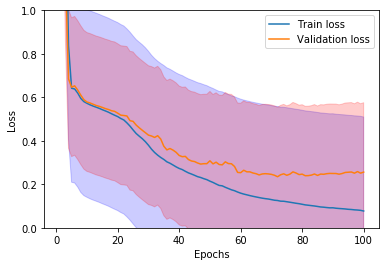

In [150]:
# Average of baseline CV2-5
x = np.arange(1,101)
# train_ave[0] = 2.3
# train_ave[1] = 1.5
# train_ave[2] = 1.0
# train_ave[3] = 0.65
# test_ave[0] = 2.6
# test_ave[1] = 2.0
# test_ave[2] = 0.8
plt.plot(x, train_ave,label='Train loss')
plt.plot(x, test_ave,label='Validation loss')
train_ave0 = 3.3980747958024344
train_ave1 = 2.37663534283638
train_ave2 = 1.6063939978679023
train_ave3 = 0.8533005490899085,
test_ave0 = 2.698855996131897
test_ave1 = 1.9895394146442413
test_ave2 = 1.200540155172348

axes = plt.gca()
axes.set_ylim([0,1])


import math

std_train = np.std(train_ave, axis=0)
#se_train = std_train/math.sqrt(6)
tr_upper = train_ave + std_train
tr_lower = train_ave - std_train
plt.fill_between(x, tr_lower, tr_upper, color='blue', alpha=.2)

std_test = np.std(test_ave, axis=0)
#se_test = std_test/math.sqrt(6)
test_upper = test_ave + std_test
test_lower = test_ave - std_test
plt.fill_between(x, test_lower, test_upper, color='red', alpha=.2)
#plt.title('Average Loss for Baseline 5-Folds Cross Validation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# Wrong loss 
tt1 = [0.5159174824754397, 0.2843389169623454, 0.19133511263256273, 0.16537002241238952, 0.14392885115618506, 0.1311930772693207, 0.1223116908998539, 0.1206125000026077, 0.10884151506858568, 0.12115500712146361, 0.16377041139639914, 0.10913726307141285, 0.09774217180286844, 0.09266951951819162, 0.10003511693018179, 0.09023245819844306, 0.08650947509643932, 0.08649200235959142, 0.08721823253047963, 0.08074417295089613, 0.07549291018707056, 0.07876035749601822, 0.07334608173308273, 0.07554140663705766, 0.07330242482324441, 0.07358620723243803, 0.07417923774725448, 0.07255018770229071, 0.09250122297089547, 0.07530349407655497, 0.07259647858639558, 0.06833371626756464, 0.06957012558511148, 0.06834425986744463, 0.07095165513843919, 0.06596365118942533, 0.22494068912540874, 0.0981901742828389, 0.08264770785657068, 0.07721822297511001, 0.07144223677460104, 0.0714750473271124, 0.06610995905551438, 0.06612748214198898, 0.06365699218198036, 0.06796687501870717, 0.06475701342181613, 0.06364816817222163, 0.0662205871194601, 0.06550269030655424, 0.06930459348950535, 0.06388249659600358, 0.06561173463705927, 0.06280122685711831, 0.06381036238356803, 0.06994823267450556, 0.06587637347790103, 0.06814541805457945, 0.06363233704663192, 0.06211920742255946, 0.06517215309819828, 0.06862941508491834, 0.06631083658430725, 0.06448736394910763, 0.06409148417878896, 0.06407367018982768, 0.0664425280992873, 0.0644531565097471, 0.06426772358827293, 0.06431027625997861, 0.06418031314387918, 0.06632000809380163, 0.06711607684458916, 0.0681446881305116, 0.06497681339775833, 0.06517117234761827, 0.17732043680734932, 0.06612228943655889, 0.06452018472676475, 0.0627637222642079, 0.06501307425787672, 0.06458156951703131, 0.0671665044889475, 0.06452911663412426, 0.0673453639804696, 0.08223094504016142, 0.06838882660182814, 0.0636889897674943, 0.06250435399124399, 0.06442222410502534, 0.06247634931545084, 0.062361074630947165, 0.06375075552690153, 0.0653556208514298, 0.06761269186002512, 0.06544599720897774, 0.06641288390771176, 0.06526216389223312, 0.06807014462538064, 0.06264766458965217] 
tt2 = [0.5231227874755859, 0.30074435472488403, 0.22769731283187866, 0.1908857822418213, 0.16296204924583435, 0.15325765311717987, 0.1423497349023819, 0.1275387406349182, 0.11951663345098495, 0.14021402597427368, 0.24370527267456055, 0.14738696813583374, 0.10033165663480759, 0.09601492434740067, 0.0943254753947258, 0.08242516219615936, 0.08270877599716187, 0.07895687967538834, 0.07426456362009048, 0.07074174284934998, 0.06514780223369598, 0.06427624076604843, 0.0614892952144146, 0.06133642420172691, 0.058661431074142456, 0.054022058844566345, 0.059114206582307816, 0.052548810839653015, 0.08744737505912781, 0.05485360696911812, 0.06024341285228729, 0.047770000994205475, 0.044553447514772415, 0.04465756192803383, 0.044499870389699936, 0.04189085587859154, 0.46739017963409424, 0.1108534187078476, 0.07573471963405609, 0.0736040249466896, 0.061443351209163666, 0.05298001319169998, 0.048643894493579865, 0.04673871025443077, 0.04353048652410507, 0.04687638208270073, 0.0403006449341774, 0.039268288761377335, 0.0424935556948185, 0.037729475647211075, 0.04209376871585846, 0.033301107585430145, 0.03384161740541458, 0.035368748009204865, 0.03236109018325806, 0.04156612977385521, 0.03697524219751358, 0.03763269633054733, 0.030764296650886536, 0.028943676501512527, 0.03108559176325798, 0.03097725473344326, 0.028322970494627953, 0.027999646961688995, 0.030423136427998543, 0.029337245970964432, 0.029276611283421516, 0.029783131554722786, 0.02817828767001629, 0.02897077053785324, 0.028241043910384178, 0.026287280023097992, 0.029004383832216263, 0.025984736159443855, 0.027498044073581696, 0.027919527143239975, 0.2570708692073822, 0.07694496959447861, 0.03685086965560913, 0.032037608325481415, 0.03614199161529541, 0.031760141253471375, 0.03420357406139374, 0.03274093195796013, 0.041239574551582336, 0.13365574181079865, 0.09722348302602768, 0.046126753091812134, 0.03924960643053055, 0.036581434309482574, 0.033630430698394775, 0.02921479567885399, 0.029114512726664543, 0.02987566962838173, 0.03123936615884304, 0.028783516958355904, 0.027349337935447693, 0.026658544316887856, 0.032966770231723785, 0.0272248312830925] 

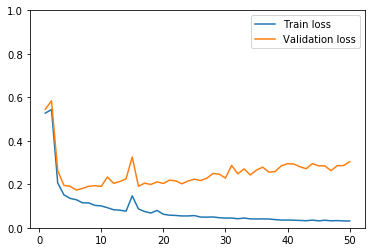

In [119]:
# 768 CV1 
Train_loss_CV1_100 = [0.5273091221849123, 0.5437870010112723, 0.20609096887831888, 0.15160983645667633, 0.1351173734292388, 0.12902014461966851, 0.11487148717666666, 0.11452998950456579, 0.1030173081283768, 0.10069093729058902, 0.09244314759659271, 0.08304813865106553, 0.08105512739469607, 0.07630721060559154, 0.14691185710641244, 0.08657245663926005, 0.07477741630282253, 0.06793882270964484, 0.07989603440122058, 0.06229122724228849, 0.05794711496370534, 0.056791224516928196, 0.05436919714945058, 0.0545957200617219, 0.05610907822847366, 0.04933699348475784, 0.04907527437899262, 0.04976568596127132, 0.04644398711388931, 0.04460994569429507, 0.04500067552241186, 0.041635892062913626, 0.04480135370977223, 0.04105288397598391, 0.040609473983446755, 0.04102296029062321, 0.0403482933761552, 0.037717642747641854, 0.035560367279686034, 0.03564852745815491, 0.03500684005363534, 0.033835159168423466, 0.03245878374824921, 0.03528582370684793, 0.03187771386001259, 0.03489995221995438, 0.03213547868654132, 0.033168589735093214, 0.03158732270821929, 0.03126709056474889, 0.03042252379236743, 0.030747095685607444, 0.030597557468960684, 0.03207639373916512, 0.02929537035136794, 0.030694013791314017, 0.029514435213059187, 0.029337454626026254, 0.028678671553886186, 0.02743120726275568, 0.02716065322359403, 0.026087317867980648, 0.02881112469670673, 0.02600804780377075, 0.025003216268184286, 0.024524823160997283, 0.025173306930810213, 0.02462621856830083, 0.02606077944316591, 0.025323617504909635, 0.035191804907905556, 0.026656653014166903, 0.026084305660333484, 0.026630999559226137, 0.02372710369915391, 0.0232474487759949, 0.023016659853359062, 0.023767374591746677, 0.06042855842194209, 0.03531715017743409, 0.02674436701151232, 0.025245311961043626, 0.02278493561122256, 0.022459110914496705, 0.021428943572876353, 0.021154924179427326, 0.02066740835046706, 0.02179253687305997, 0.021009412933684263, 0.02124290737750319, 0.02054282642590503, 0.020631572202546522, 0.019959025007362168, 0.020758299467464287, 0.020113735382134717, 0.020456342938511323, 0.022825386413993936, 0.020653128274716437, 0.020483633571226772, 0.018874652897162985]
Test_loss_CV1_100 = [0.5453753471374512, 0.5837863087654114, 0.26276180148124695, 0.19515898823738098, 0.19058014452457428, 0.17379459738731384, 0.1812133938074112, 0.19108639657497406, 0.1935083568096161, 0.19005386531352997, 0.23375506699085236, 0.20455612242221832, 0.2125699520111084, 0.22545257210731506, 0.3254636824131012, 0.1911865770816803, 0.20544534921646118, 0.19907177984714508, 0.2111317664384842, 0.203989639878273, 0.21911147236824036, 0.21592985093593597, 0.20255377888679504, 0.21523389220237732, 0.22345690429210663, 0.21735067665576935, 0.2280932068824768, 0.24999341368675232, 0.24676072597503662, 0.22873686254024506, 0.28691256046295166, 0.2481270432472229, 0.27096080780029297, 0.24293766915798187, 0.26534828543663025, 0.2788237929344177, 0.25594720244407654, 0.2587626576423645, 0.28498172760009766, 0.2946118116378784, 0.2934322953224182, 0.2806645929813385, 0.2717609107494354, 0.29500696063041687, 0.28502586483955383, 0.28472092747688293, 0.2629440128803253, 0.2857988178730011, 0.28615763783454895, 0.3041861653327942, 0.2836916744709015, 0.2861833870410919, 0.28274863958358765, 0.3041922152042389, 0.3034380376338959, 0.3051060438156128, 0.2780230641365051, 0.3097420930862427, 0.3158501088619232, 0.31114470958709717, 0.30770617723464966, 0.30041149258613586, 0.30593937635421753, 0.3077763020992279, 0.32668086886405945, 0.3188049793243408, 0.31333744525909424, 0.3210144340991974, 0.3297644257545471, 0.3057951033115387, 0.32378488779067993, 0.31502047181129456, 0.2907857596874237, 0.30383145809173584, 0.2961486577987671, 0.29997706413269043, 0.3096637725830078, 0.3267516791820526, 0.1886889636516571, 0.23572362959384918, 0.26792341470718384, 0.28676846623420715, 0.30415818095207214, 0.2913825511932373, 0.313914030790329, 0.3177000880241394, 0.32627347111701965, 0.3217485845088959, 0.3119628131389618, 0.3281826972961426, 0.30646219849586487, 0.3160982131958008, 0.33139875531196594, 0.33729085326194763, 0.33211618661880493, 0.3317249119281769, 0.3318724036216736, 0.3613014817237854, 0.33709466457366943, 0.32251912355422974]
Train_loss_CV1_50 = Train_loss_CV1_100[:50]
Test_loss_CV1_50 = Test_loss_CV1_100[:50]
x = np.arange(1,51)
plt.plot(x, Train_loss_CV1_50,label='Train loss')
plt.plot(x, Test_loss_CV1_50,label='Validation loss')
axes = plt.gca()
axes.set_ylim([0,1])
plt.legend()
plt.show()

In [147]:
min(enumerate(Test_loss_CV1_100), key=itemgetter(1))[0]

5

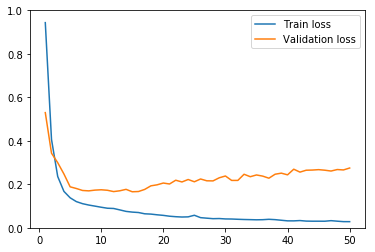

In [99]:
# 768 CV3
Train_loss_CV3 = [0.9435081363966068, 0.4065207534780105, 0.23580988698328534, 0.16744455245013037, 0.1379755469970405, 0.1204699637213101, 0.11089795432053506, 0.10461955626184742, 0.09967826376669109, 0.0945647571546336, 0.09000527144720157, 0.08887862507253885, 0.08227492535176377, 0.07548015921687086, 0.072199162406226, 0.07030290757150699, 0.0644177970631669, 0.06300580268725753, 0.05979940046866735, 0.057154210711208485, 0.053298696875572205, 0.05103508565419664, 0.049555763020180166, 0.0503325880660365, 0.05766764166764915, 0.04667311945619682, 0.0442488887735332, 0.04196777982482066, 0.042586666687081255, 0.04076818081860741, 0.04036786449917903, 0.039158785909724735, 0.038175837330830596, 0.03753726304663966, 0.03680933138821274, 0.03729594242759049, 0.0390935898758471, 0.03751235366022835, 0.03468959945409248, 0.03194162521200875, 0.03187496397489061, 0.033293478384924434, 0.030828068440314382, 0.030363271206927795, 0.030364828223052125, 0.030240011498487245, 0.032833838233879455, 0.030414205122118194, 0.0283481136818106, 0.028235035579806816, 0.028364023678780843, 0.0367139396063673, 0.030266739272822935, 0.02842352700342114, 0.027204185025766492, 0.027194722613785416, 0.02745565091026947, 0.026906041195616126, 0.02688270469661802, 0.02614152090003093, 0.024931664287578315, 0.024258850879656773, 0.02494850424894442, 0.024676374295571197, 0.024139456955405574, 0.02425961596115182, 0.025010763298875343, 0.02461289628020798, 0.02472386518881346, 0.024553090624976903, 0.024115547304973006, 0.024106795511518914, 0.023481530777644366, 0.027816043914450955, 0.08025569297994177, 0.043916401104070246, 0.03197091264883056, 0.027822414025043447, 0.025511408942596365, 0.02388217158537979, 0.023004091034332912, 0.022227556561119854, 0.022329883882775903, 0.022119947980778914, 0.022447155478099983, 0.02265519613865763, 0.021332373687376577, 0.02118056083175664, 0.021287762365924816, 0.02076514484360814, 0.020818730583414435, 0.020661122320840757, 0.020688950918459643, 0.020619646064005792, 0.020598338994507987, 0.020690588843232643, 0.020406602319174755, 0.020361951377708465, 0.0205667006278721, 0.019769122280801337]
Test_loss_CV3 = [0.5296486020088196, 0.3430345058441162, 0.2994423806667328, 0.24745410680770874, 0.18844486773014069, 0.18070828914642334, 0.17166335880756378, 0.16985858976840973, 0.1733163595199585, 0.17487198114395142, 0.17259900271892548, 0.16654780507087708, 0.17021840810775757, 0.17684420943260193, 0.165779709815979, 0.1668468713760376, 0.17649109661579132, 0.19297052919864655, 0.19766926765441895, 0.20585289597511292, 0.20148999989032745, 0.21882717311382294, 0.2108081728219986, 0.22212806344032288, 0.2116982489824295, 0.22448310256004333, 0.21616743505001068, 0.2156924307346344, 0.2299450933933258, 0.2382783591747284, 0.21791206300258636, 0.2179679274559021, 0.24624106287956238, 0.23499059677124023, 0.2430371195077896, 0.23769427835941315, 0.22812968492507935, 0.24641628563404083, 0.25129473209381104, 0.24355025589466095, 0.2695004940032959, 0.2561095356941223, 0.2648050785064697, 0.2655693292617798, 0.26744282245635986, 0.26487281918525696, 0.2610625624656677, 0.267920583486557, 0.2661161720752716, 0.27492591738700867, 0.27671754360198975, 0.265494704246521, 0.27195119857788086, 0.26150014996528625, 0.2664594352245331, 0.285080224275589, 0.2756655216217041, 0.2820016145706177, 0.2847629189491272, 0.2788636088371277, 0.29086413979530334, 0.29996100068092346, 0.28787317872047424, 0.30413705110549927, 0.29455944895744324, 0.29968515038490295, 0.2877572476863861, 0.3073062300682068, 0.3183281719684601, 0.30369091033935547, 0.3094688355922699, 0.2925412356853485, 0.32841619849205017, 0.37659701704978943, 0.193104550242424, 0.2219928801059723, 0.2595561146736145, 0.2587472200393677, 0.27272510528564453, 0.27595430612564087, 0.2858448028564453, 0.30042463541030884, 0.3074987828731537, 0.29601648449897766, 0.28830888867378235, 0.28772374987602234, 0.29666584730148315, 0.30265572667121887, 0.3043985664844513, 0.3277312219142914, 0.3110359013080597, 0.3171258866786957, 0.3115479350090027, 0.31877052783966064, 0.32558077573776245, 0.31438708305358887, 0.3302106261253357, 0.3160540759563446, 0.3204014301300049, 0.3217340111732483] 
x = np.arange(1,51)
plt.plot(x, Train_loss_CV3[:50],label='Train loss')
plt.plot(x, Test_loss_CV3[:50],label='Validation loss')
axes = plt.gca()
axes.set_ylim([0,1])
plt.legend()
plt.show()

In [148]:
min(enumerate(Test_loss_CV3 ), key=itemgetter(1))[0]

14

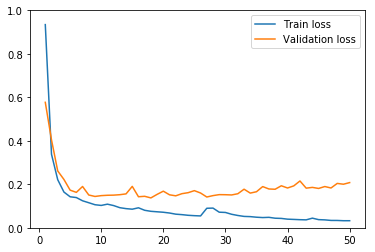

In [100]:
# 768 CV2
Train_loss_CV2 = [0.9344513947144151, 0.3381250756792724, 0.22128755149121085, 0.16439357120543718, 0.14263313806926212, 0.1391101493500173, 0.12424600807329018, 0.115291487891227, 0.10610687895677984, 0.10288094364417096, 0.10868584861358006, 0.10224387942192455, 0.09248906436065833, 0.08817126873570184, 0.08559188603733976, 0.09201260454331835, 0.0805344960341851, 0.0758333388560762, 0.07364734782216449, 0.07148867147043347, 0.06796171066040795, 0.06269418017473072, 0.06050986028276384, 0.057494067664568625, 0.0557776972418651, 0.0545881885336712, 0.08981137486019482, 0.09060300157094996, 0.07179566530976444, 0.07058033661451191, 0.06217504967935383, 0.056652260051729776, 0.05237693972109506, 0.051412320657012366, 0.048693469647939004, 0.047068211094786726, 0.0481355165441831, 0.04411507518185923, 0.04313366871792823, 0.039723298978060484, 0.03856226817394296, 0.03730751715678101, 0.03655445335122446, 0.04435772208186487, 0.03756584149474899, 0.036460162683700524, 0.03391068803224092, 0.03379524530222019, 0.03258809771311159, 0.032566304687255375, 0.03232678602216765, 0.031576484305939324, 0.03146064964433511, 0.031654521609501295, 0.030693062794550013, 0.031037459964863956, 0.03062261479984348, 0.029599658795632422, 0.030764094786718488, 0.028861216521666695, 0.027314271137584, 0.026725851562029373, 0.02602604215887065, 0.026109082798939198, 0.026847139408346266, 0.0365201944562917, 0.07265673818377157, 0.04065851149304459, 0.03248137823538855, 0.02947252451364572, 0.028104394616093487, 0.03291292985280355, 0.027166844345629215, 0.025923170770208042, 0.025163740676362067, 0.02455019405654942, 0.024156516359653324, 0.02405666484264657, 0.024051795868823927, 0.02333241858286783, 0.02301423449534923, 0.022627014375757426, 0.023247130079350125, 0.02427433547563851, 0.022300126942961167, 0.02219112522046392, 0.022038566724707682, 0.02198337020430093, 0.022328318484748404, 0.02300991944503039, 0.022940127935726196, 0.022252532731120784, 0.02236251470943292, 0.02978423734505971, 0.062045353620002665, 0.0328359940322116, 0.025892424241950113, 0.02382392135526364, 0.022430436220020056, 0.0212207273968185]
Test_loss_CV2 = [0.5770596265792847, 0.40433162450790405, 0.2615169286727905, 0.22233498096466064, 0.1731151044368744, 0.16300559043884277, 0.18999895453453064, 0.15081311762332916, 0.14416244626045227, 0.1479492485523224, 0.14961324632167816, 0.15022411942481995, 0.1522531658411026, 0.1559736579656601, 0.19044913351535797, 0.1428215503692627, 0.14485791325569153, 0.13747188448905945, 0.1537150740623474, 0.16844841837882996, 0.1517324149608612, 0.14706648886203766, 0.15693703293800354, 0.16153861582279205, 0.1708531379699707, 0.15995268523693085, 0.1415899097919464, 0.1480434238910675, 0.1525297462940216, 0.15213343501091003, 0.1510930061340332, 0.15667299926280975, 0.1775125116109848, 0.15957440435886383, 0.165898397564888, 0.18956509232521057, 0.17853762209415436, 0.17726396024227142, 0.19329825043678284, 0.18305890262126923, 0.1927468329668045, 0.2153504192829132, 0.182325080037117, 0.18584591150283813, 0.18097135424613953, 0.18976083397865295, 0.18311981856822968, 0.20412519574165344, 0.20042528212070465, 0.20792707800865173, 0.18643231689929962, 0.20718657970428467, 0.2215249389410019, 0.19634120166301727, 0.19983038306236267, 0.18311704695224762, 0.19748805463314056, 0.20887848734855652, 0.20768864452838898, 0.22592730820178986, 0.2138146013021469, 0.2100016474723816, 0.2148583084344864, 0.23060068488121033, 0.20723354816436768, 0.3763006925582886, 0.15467491745948792, 0.18712720274925232, 0.19917210936546326, 0.20223389565944672, 0.20835605263710022, 0.20145168900489807, 0.21362021565437317, 0.22358761727809906, 0.22589433193206787, 0.21969670057296753, 0.22914835810661316, 0.23336166143417358, 0.22183799743652344, 0.2536744177341461, 0.2539418041706085, 0.25517743825912476, 0.24447724223136902, 0.23293904960155487, 0.26380568742752075, 0.2667415738105774, 0.266218364238739, 0.26359063386917114, 0.26475200057029724, 0.25142934918403625, 0.2574038803577423, 0.25368449091911316, 0.27547916769981384, 0.26116859912872314, 0.17354726791381836, 0.19300450384616852, 0.2219274789094925, 0.23868127167224884, 0.2411264181137085, 0.23679892718791962]

x = np.arange(1,51)
plt.plot(x, Train_loss_CV2[:50],label='Train loss')
plt.plot(x, Test_loss_CV2[:50],label='Validation loss')
axes = plt.gca()
axes.set_ylim([0,1])
plt.legend()
plt.show()

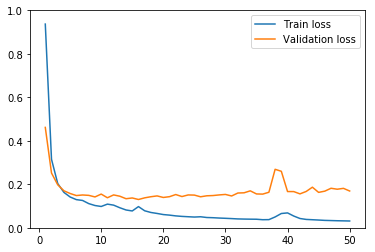

In [129]:
# 768 CV4
x = np.arange(1,51)
plt.plot(x, Train_loss_CV2[:50],label='Train loss')
plt.plot(x, Test_loss_CV2[:50],label='Validation loss')
axes = plt.gca()
axes.set_ylim([0,1])
plt.legend()
plt.show()

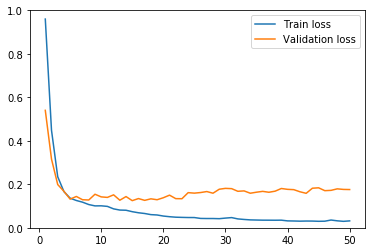

In [142]:
# 768 CV5
x = np.arange(1,51)
plt.plot(x, Train_loss_CV5[:50],label='Train loss')
plt.plot(x, Test_loss_CV5[:50],label='Validation loss')
axes = plt.gca()
axes.set_ylim([0,1])
plt.legend()
plt.show()

In [141]:
# 768 CV4 and CV5

# CV4 loss
Train_loss_CV4 = [0.936853110169371, 0.315095121661822, 0.20366655196994543, 0.16279891273006797, 0.14162833608376482, 0.12953839908974865, 0.1257644514553249, 0.11120411831264694, 0.1024685431427012, 0.0980711296821634, 0.10887481117000182, 0.10421572097887595, 0.09219520872769256, 0.0819632801382492, 0.07745486994584401, 0.09750235849060118, 0.07827652113822599, 0.0705114002727593, 0.06599238122968624, 0.06088451241763929, 0.05828395299613476, 0.0547750984163334, 0.052439666469581425, 0.050899087296177946, 0.04943933062410603, 0.05076416616793722, 0.047319447117236756, 0.04641034846038868, 0.04484087391756475, 0.04367453469118724, 0.042348214075900614, 0.040830474463291466, 0.040135663778831564, 0.03966109757311642, 0.039362756768241525, 0.0372443370676289, 0.03758731119645139, 0.049904619227163494, 0.06573264335747808, 0.06848905336422224, 0.05405787153479954, 0.04276028946818163, 0.03853493851299087, 0.03712993522640318, 0.03569571076271435, 0.03411212705153351, 0.03331197014388939, 0.032455213620172195, 0.0319190375545683, 0.03126288688508794, 0.030982795695308596, 0.030667484000635643, 0.030565312093434233, 0.02977877636052047, 0.029612205922603607, 0.02963006393595909, 0.029304779425729066, 0.029350268460499745, 0.029374689077182364, 0.028237159771379083, 0.0277379608208624, 0.02667290500054757, 0.02580290586532404, 0.02656770796359827, 0.025773162740127493, 0.026268224076678354, 0.026099679293110967, 0.026558665985551972, 0.025207749897769343, 0.02517060425210123, 0.025069642792611074, 0.025979452359024435, 0.025048464303836226, 0.025814206106588244, 0.0248072748654522, 0.024494080105796456, 0.05993375562441846, 0.0375607370515354, 0.031279395043384284, 0.027524034725502133, 0.02569652577706923, 0.0245386766619049, 0.024098796595353633, 0.023534528523062665, 0.02309723210055381, 0.022975443260899436, 0.022530680638737977, 0.022353754960931838, 0.022337610154257465, 0.02237943581227834, 0.022326358283559482, 0.022471690201200545, 0.02251752696853752, 0.022284444305114448, 0.02197304368019104, 0.07317918226666127, 0.04047874838579446, 0.031175099196843803, 0.028714555529101442, 0.024454952023612957]
Test_loss_CV4 = [0.4616818130016327, 0.25191861391067505, 0.19791917502880096, 0.17021460831165314, 0.15773925185203552, 0.14832517504692078, 0.15094488859176636, 0.14918014407157898, 0.1419568955898285, 0.15505962073802948, 0.13818521797657013, 0.15122894942760468, 0.14523164927959442, 0.13375060260295868, 0.13721293210983276, 0.1301679164171219, 0.1377781331539154, 0.14288108050823212, 0.1466279774904251, 0.13952326774597168, 0.1431381106376648, 0.1529734581708908, 0.1437208354473114, 0.15109561383724213, 0.15041522681713104, 0.14262057840824127, 0.14718785881996155, 0.1483202576637268, 0.15122705698013306, 0.1534615308046341, 0.14635419845581055, 0.15994898974895477, 0.16094964742660522, 0.16996440291404724, 0.1557021290063858, 0.1549253910779953, 0.16348931193351746, 0.2690550982952118, 0.2599017024040222, 0.16674849390983582, 0.16654233634471893, 0.15600912272930145, 0.16711129248142242, 0.1867361068725586, 0.16289487481117249, 0.1685788780450821, 0.18181468546390533, 0.17742452025413513, 0.18142634630203247, 0.1692158430814743, 0.18505074083805084, 0.1797940880060196, 0.1879907101392746, 0.18086335062980652, 0.18682456016540527, 0.1909085065126419, 0.18428641557693481, 0.1947970688343048, 0.17836083471775055, 0.18813152611255646, 0.1914587914943695, 0.18845663964748383, 0.18763650953769684, 0.18622049689292908, 0.19609060883522034, 0.20000328123569489, 0.1897977739572525, 0.19977226853370667, 0.19701841473579407, 0.19349099695682526, 0.20201683044433594, 0.2029639035463333, 0.19195601344108582, 0.20354320108890533, 0.2012021690607071, 0.19631661474704742, 0.16582386195659637, 0.17729349434375763, 0.2056284099817276, 0.18347816169261932, 0.18474441766738892, 0.19154949486255646, 0.20060357451438904, 0.20361649990081787, 0.20652788877487183, 0.22177845239639282, 0.20574896037578583, 0.21406567096710205, 0.21728500723838806, 0.2146134227514267, 0.20745506882667542, 0.22161197662353516, 0.2063402235507965, 0.22076188027858734, 0.24539177119731903, 0.15139301121234894, 0.17668230831623077, 0.2072298675775528, 0.194101944565773, 0.19566209614276886]

# CV5 loss
Train_loss_CV5 = [0.9598956853151321, 0.4485708797971408, 0.2348215033610662, 0.1664514181514581, 0.13628957079102597, 0.12558220396749675, 0.11781529476866126, 0.10693722257080178, 0.10076709860004485, 0.10108685850476225, 0.09847985122663279, 0.08703369274735451, 0.0815984266034017, 0.08077149760598938, 0.07410466981430848, 0.06915767797424148, 0.06574821386796732, 0.06058732431847602, 0.05896179948467761, 0.054038974340073764, 0.051021137197191514, 0.04876637206568072, 0.047901476422945656, 0.04723927782227596, 0.047138829987185694, 0.04309915320482105, 0.04265444950821499, 0.04268363219064971, 0.041916095884516835, 0.044596977260274194, 0.04689560170906285, 0.04088155242304007, 0.038387036959951125, 0.03639839607058093, 0.03571721319652473, 0.03510637222401177, 0.035001096121656396, 0.034795539861079305, 0.03509176916365201, 0.03179670914929981, 0.031274760549422354, 0.03052489705927049, 0.031095622243204463, 0.030936149647459388, 0.029899643016202997, 0.03037451207637787, 0.03570137782177577, 0.03210114123066887, 0.02972332848003134, 0.031783737785493336, 0.07470156853863348, 0.08456393956051518, 0.06054686941206455, 0.04794559674337506, 0.04033636387127141, 0.03679860753860945, 0.03493593642876173, 0.0330943333877561, 0.03168494735533992, 0.03019240191982438, 0.029343622639620055, 0.0284111150734437, 0.027973145304713398, 0.028078357436849426, 0.08099086821312085, 0.059776292531751096, 0.04361207554272065, 0.03789229419392844, 0.03386230258426318, 0.0319098950518916, 0.03029295472272982, 0.029492276022210717, 0.02873547576988737, 0.028502727878124762, 0.027030764050626505, 0.026751634936469298, 0.026756253462129582, 0.026433424500282854, 0.02634972339728847, 0.02503553902109464, 0.024726760379659634, 0.02402423310559243, 0.024264451523777097, 0.024214155525745202, 0.023799954738933593, 0.02383521858913203, 0.02339709094182278, 0.023558774633177865, 0.024085130290283512, 0.023529425127586972, 0.023276749920720857, 0.023545289256920416, 0.023878069090036053, 0.02320610995714863, 0.023202627800249804, 0.023126069611559313, 0.02305565376688416, 0.022522560611832887, 0.022721686264655244, 0.021699275394591194]
Test_loss_CV5 = [0.540144681930542, 0.31603187322616577, 0.19885611534118652, 0.1678028404712677, 0.13183075189590454, 0.14414383471012115, 0.12899966537952423, 0.12791165709495544, 0.1543116718530655, 0.14219965040683746, 0.13981010019779205, 0.15157058835029602, 0.12684600055217743, 0.1436072438955307, 0.12487724423408508, 0.1344430297613144, 0.12623292207717896, 0.13325414061546326, 0.12906590104103088, 0.13820722699165344, 0.15016843378543854, 0.13413943350315094, 0.1337047964334488, 0.16165688633918762, 0.15941521525382996, 0.16215430200099945, 0.16670532524585724, 0.15907169878482819, 0.17736905813217163, 0.1813604235649109, 0.18006592988967896, 0.16788248717784882, 0.16970649361610413, 0.15899650752544403, 0.1637163907289505, 0.16756150126457214, 0.16342966258525848, 0.16845646500587463, 0.18074734508991241, 0.17688731849193573, 0.17547136545181274, 0.16566725075244904, 0.15857283771038055, 0.1820078045129776, 0.18390125036239624, 0.1707805097103119, 0.17217767238616943, 0.1791258305311203, 0.1765354722738266, 0.17594243586063385, 0.27584734559059143, 0.18604397773742676, 0.1690477579832077, 0.14096301794052124, 0.1447182446718216, 0.15624840557575226, 0.1668080985546112, 0.1542307436466217, 0.1792486160993576, 0.1649414598941803, 0.16784067451953888, 0.15629254281520844, 0.16877205669879913, 0.19672106206417084, 0.13965754210948944, 0.13329161703586578, 0.16005371510982513, 0.18181154131889343, 0.16057084500789642, 0.1702793538570404, 0.18791361153125763, 0.1757737100124359, 0.19030605256557465, 0.19330374896526337, 0.18212562799453735, 0.1978754848241806, 0.19853995740413666, 0.19852332770824432, 0.2024981826543808, 0.1972099393606186, 0.20605196058750153, 0.20382888615131378, 0.2021285444498062, 0.20811137557029724, 0.22440923750400543, 0.21383903920650482, 0.2085052728652954, 0.2088368833065033, 0.21204867959022522, 0.21050100028514862, 0.2069418728351593, 0.22722278535366058, 0.2205631583929062, 0.20459404587745667, 0.23147229850292206, 0.21786713600158691, 0.22188310325145721, 0.21849150955677032, 0.2335643321275711, 0.21891416609287262] 

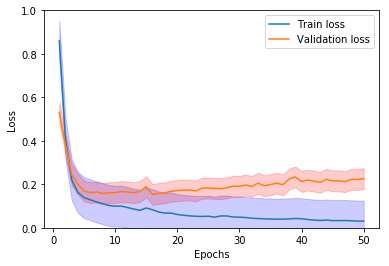

In [149]:
# 768 average of CV123
# Need to modift the train and test zip and the number in the division

trainzip = zip(Train_loss_CV1_100, Train_loss_CV2, Train_loss_CV3, Train_loss_CV4, Train_loss_CV5)
train_sum = [sum(item) for item in trainzip]
ave_train = [x / 5 for x in train_sum]

testzip = zip(Test_loss_CV1_100, Test_loss_CV2, Test_loss_CV3, Test_loss_CV4, Test_loss_CV5)
test_sum = [sum(item) for item in testzip]
ave_test = [x / 5 for x in test_sum]

# Standard Deviation region
x1 = np.arange(1,101)
x2 = np.arange(1,51)
std_train = np.std(ave_train, axis=0)
# se_train = std_train/math.sqrt(48)
# tr_upper = ave_train + se_train
# tr_lower = ave_train - se_train
tr_upper = ave_train + std_train
tr_lower = ave_train - std_train
plt.fill_between(x2, tr_lower[:50], tr_upper[:50], color='blue', alpha=.2)

std_test = np.std(ave_test, axis=0)
# se_test = std_test/math.sqrt(6)
# test_upper = ave_test + se_test
# test_lower = ave_test - se_test
test_upper = ave_test + std_test
test_lower = ave_test - std_test
plt.fill_between(x2, test_lower[:50], test_upper[:50], color='red', alpha=.2)

# Plot the average line
plt.plot(x2, ave_train[:50],label='Train loss')
plt.plot(x2, ave_test[:50],label='Validation loss')
axes = plt.gca()
axes.set_ylim([0,1])
#plt.title('Average Loss for 5-folds Validation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [163]:
baseline1 = [2.7884323596954346, 1.8733906745910645, 1.0851300954818726, 0.6951130032539368, 0.6970399618148804, 0.6936424374580383, 0.6646554470062256, 0.6330307722091675, 0.6089826822280884, 0.6014939546585083, 0.5915054678916931, 0.5866289734840393, 0.5825690031051636, 0.57579106092453, 0.5700114369392395, 0.5639836192131042, 0.5573800206184387, 0.5523406863212585, 0.545838475227356, 0.5407241582870483, 0.5346599221229553, 0.5290789604187012, 0.5197934508323669, 0.5158145427703857, 0.5187287330627441, 0.5089477300643921, 0.4989638328552246, 0.49166014790534973, 0.48894551396369934, 0.4789479374885559, 0.47060447931289673, 0.4658021330833435, 0.46224889159202576, 0.4691196084022522, 0.4503602087497711, 0.4434531331062317, 0.4390159547328949, 0.43189021944999695, 0.42991113662719727, 0.4314422309398651, 0.4178846478462219, 0.40980830788612366, 0.4010166525840759, 0.3977915644645691, 0.39681312441825867, 0.38553670048713684, 0.38797929883003235, 0.37582942843437195, 0.3736126124858856, 0.45102593302726746, 0.35109496116638184, 0.43401581048965454, 0.376754492521286, 0.4656139016151428, 0.5255897045135498, 0.43633612990379333, 0.3909258246421814, 0.38531243801116943, 0.292036771774292, 0.28028005361557007, 0.30709436535835266, 0.27409613132476807, 0.25531718134880066, 0.2673613131046295, 0.2388482689857483, 0.2334378957748413, 0.238999605178833, 0.26450297236442566, 0.2540090084075928, 0.25215432047843933, 0.23377329111099243, 0.23261712491512299, 0.26164597272872925, 0.28428518772125244, 0.23561571538448334, 0.23295101523399353, 0.2880859971046448, 0.23187659680843353, 0.23359541594982147, 0.2250431478023529, 0.19891276955604553, 0.2065136879682541, 0.23330247402191162, 0.22009798884391785, 0.21355895698070526, 0.21785728633403778, 0.22110699117183685, 0.20139089226722717, 0.21693776547908783, 0.22210296988487244, 0.2109849750995636, 0.21035027503967285, 0.24617891013622284, 0.24805915355682373, 0.2377764731645584, 0.2573188543319702, 0.24496550858020782, 0.27550554275512695, 0.24215669929981232, 0.25304511189460754] 

baseline2 = [2.6984264850616455, 2.1479756832122803, 1.3760355710983276, 0.710024356842041, 0.6367373466491699, 0.6569140553474426, 0.6370440721511841, 0.6066354513168335, 0.5828995704650879, 0.568951427936554, 0.5623118281364441, 0.5525039434432983, 0.5485679507255554, 0.5448095202445984, 0.5379059314727783, 0.5329275727272034, 0.5316739678382874, 0.5205960273742676, 0.5157294869422913, 0.5109010934829712, 0.5074238181114197, 0.5050098896026611, 0.5001289248466492, 0.4990979731082916, 0.48803216218948364, 0.48205116391181946, 0.47194188833236694, 0.47377723455429077, 0.5010443925857544, 0.4848679006099701, 0.555463969707489, 0.4611377716064453, 0.39744439721107483, 0.3852229714393616, 0.355972558259964, 0.34329453110694885, 0.41774874925613403, 0.32909947633743286, 0.2860236167907715, 0.2717630863189697, 0.27137255668640137, 0.2709382474422455, 0.27133482694625854, 0.27890467643737793, 0.2811567485332489, 0.3006581962108612, 0.2975815534591675, 0.3061909079551697, 0.29261812567710876, 0.28634384274482727, 0.28697386384010315, 0.29505905508995056, 0.275030255317688, 0.2731143832206726, 0.269726425409317, 0.2642557919025421, 0.2772546410560608, 0.266469269990921, 0.2630583345890045, 0.2510799169540405, 0.25552767515182495, 0.264762818813324, 0.26642900705337524, 0.2574233412742615, 0.2771674394607544, 0.2699151039123535, 0.2525791823863983, 0.2705141603946686, 0.25420886278152466, 0.2539896070957184, 0.28403744101524353, 0.2646322548389435, 0.24996232986450195, 0.2517736256122589, 0.27202123403549194, 0.28699731826782227, 0.2801998257637024, 0.3004283308982849, 0.2683809995651245, 0.28122207522392273, 0.3062076270580292, 0.2606830298900604, 0.2629103362560272, 0.2886302173137665, 0.27037617564201355, 0.27616289258003235, 0.29344964027404785, 0.3115962743759155, 0.3195003271102905, 0.3374096751213074, 0.32457610964775085, 0.29252889752388, 0.2937796413898468, 0.2889692485332489, 0.28896617889404297, 0.29599982500076294, 0.2816580533981323, 0.30130094289779663, 0.28494781255722046, 0.30338332056999207]

baseline3 = [2.725968360900879, 2.0811963081359863, 1.2648297548294067, 0.671245276927948, 0.6332830786705017, 0.641472578048706, 0.6129806041717529, 0.5849385857582092, 0.5722872018814087, 0.56365567445755, 0.5606791973114014, 0.5563960671424866, 0.5514820218086243, 0.5462743639945984, 0.5408521294593811, 0.5344077348709106, 0.5267974138259888, 0.522709846496582, 0.5189728736877441, 0.5040268301963806, 0.48715201020240784, 0.48455876111984253, 0.4524034857749939, 0.4328494369983673, 0.40120458602905273, 0.38246914744377136, 0.40035468339920044, 0.424238920211792, 0.35493218898773193, 0.33832335472106934, 0.3153610825538635, 0.31593939661979675, 0.3266699016094208, 0.32865720987319946, 0.29929524660110474, 0.2793772518634796, 0.27294695377349854, 0.28424444794654846, 0.261078417301178, 0.28535905480384827, 0.2896888256072998, 0.27010640501976013, 0.26712101697921753, 0.2421359419822693, 0.2343825101852417, 0.23165515065193176, 0.2245965152978897, 0.23890745639801025, 0.22830097377300262, 0.22880840301513672, 0.22624021768569946, 0.21968095004558563, 0.2032662183046341, 0.20937876403331757, 0.21419589221477509, 0.2111508697271347, 0.2334425151348114, 0.22697074711322784, 0.22261936962604523, 0.22032293677330017, 0.21901080012321472, 0.21146497130393982, 0.20887652039527893, 0.21230356395244598, 0.23532553017139435, 0.2317754477262497, 0.22386278212070465, 0.23350933194160461, 0.22725756466388702, 0.2321849912405014, 0.23580628633499146, 0.2398001104593277, 0.22161029279232025, 0.22501662373542786, 0.2219194620847702, 0.23192937672138214, 0.23202812671661377, 0.2565385699272156, 0.23670947551727295, 0.2332076132297516, 0.2460825890302658, 0.2355848103761673, 0.2453555464744568, 0.2505373954772949, 0.26140403747558594, 0.2534835934638977, 0.25106173753738403, 0.24453693628311157, 0.2478882372379303, 0.24956053495407104, 0.25957372784614563, 0.24940861761569977, 0.24464158713817596, 0.2606222629547119, 0.2703552544116974, 0.25626426935195923, 0.25881269574165344, 0.2534004747867584, 0.24814511835575104, 0.25582587718963623]

baseline4 = [2.6550323963165283, 1.82688570022583, 1.0728963613510132, 0.6438012719154358, 0.5898420214653015, 0.5781044960021973, 0.5735015869140625, 0.5609188675880432, 0.5425616502761841, 0.5377725958824158, 0.5323038697242737, 0.5267361402511597, 0.5179794430732727, 0.5120922327041626, 0.5091232657432556, 0.5017738342285156, 0.4947911500930786, 0.4934856593608856, 0.49118757247924805, 0.4833252727985382, 0.467830628156662, 0.4829558730125427, 0.5127939581871033, 0.42663535475730896, 0.45793789625167847, 0.44717177748680115, 0.33501049876213074, 0.31125399470329285, 0.300327867269516, 0.28469908237457275, 0.2763385474681854, 0.26793691515922546, 0.2729763388633728, 0.26125025749206543, 0.2522549331188202, 0.24632057547569275, 0.2501516044139862, 0.22425857186317444, 0.2262750118970871, 0.22388988733291626, 0.20889919996261597, 0.21722164750099182, 0.2028551995754242, 0.20350822806358337, 0.19291333854198456, 0.18767763674259186, 0.18688105046749115, 0.17698274552822113, 0.17388978600502014, 0.179362490773201, 0.17006990313529968, 0.17160367965698242, 0.17022058367729187, 0.16235923767089844, 0.16445131599903107, 0.16285382211208344, 0.15778955817222595, 0.1528424471616745, 0.157155379652977, 0.16046634316444397, 0.15511605143547058, 0.15485140681266785, 0.15696227550506592, 0.15451158583164215, 0.15133821964263916, 0.1514483541250229, 0.16015920042991638, 0.14631514251232147, 0.14819346368312836, 0.14934273064136505, 0.14667272567749023, 0.1462341696023941, 0.1554417759180069, 0.14954447746276855, 0.1396825611591339, 0.14371879398822784, 0.14718757569789886, 0.14828182756900787, 0.15228870511054993, 0.1493188738822937, 0.1478927731513977, 0.14742867648601532, 0.14424748718738556, 0.14091908931732178, 0.15138913691043854, 0.14502054452896118, 0.14892339706420898, 0.1474495530128479, 0.1421470195055008, 0.15633176267147064, 0.14882414042949677, 0.1450856775045395, 0.14991673827171326, 0.14630134403705597, 0.15693272650241852, 0.147468701004982, 0.15203000605106354, 0.14695897698402405, 0.14814801514148712, 0.14295034110546112]

baseline5 = [2.6728389263153076, 1.7921847105026245, 1.038945198059082, 0.6761286854743958, 0.642193615436554, 0.6313169598579407, 0.6083080172538757, 0.590998649597168, 0.5768415331840515, 0.5686540007591248, 0.566236674785614, 0.5607043504714966, 0.5516327023506165, 0.5500084757804871, 0.5459393858909607, 0.5387868285179138, 0.5357667207717896, 0.5293331146240234, 0.5287351608276367, 0.5201748013496399, 0.5112141370773315, 0.5022818446159363, 0.49718624353408813, 0.49354296922683716, 0.4856448471546173, 0.4792899191379547, 0.469849169254303, 0.46493011713027954, 0.45332926511764526, 0.45438987016677856, 0.39435529708862305, 0.43705254793167114, 0.49148303270339966, 0.38078147172927856, 0.36319053173065186, 0.32246696949005127, 0.29758572578430176, 0.27636829018592834, 0.2890247404575348, 0.2768290936946869, 0.26851922273635864, 0.25287413597106934, 0.24420307576656342, 0.23751448094844818, 0.23568999767303467, 0.2240680456161499, 0.22300150990486145, 0.234220951795578, 0.2358533889055252, 0.22347459197044373, 0.21202607452869415, 0.20335280895233154, 0.21206600964069366, 0.20093806087970734, 0.19442611932754517, 0.1970212459564209, 0.19083552062511444, 0.2052767425775528, 0.18185454607009888, 0.19386181235313416, 0.1786506175994873, 0.17114487290382385, 0.1881229728460312, 0.18616004288196564, 0.17139947414398193, 0.16808941960334778, 0.17905224859714508, 0.17824140191078186, 0.1753791868686676, 0.17739693820476532, 0.17643511295318604, 0.17336979508399963, 0.16996429860591888, 0.17359961569309235, 0.17013025283813477, 0.17197994887828827, 0.1679816097021103, 0.17329032719135284, 0.17412978410720825, 0.17879456281661987, 0.16591830551624298, 0.16990426182746887, 0.1755516529083252, 0.17499090731143951, 0.17024178802967072, 0.18098782002925873, 0.17889708280563354, 0.18896183371543884, 0.1859118640422821, 0.17616450786590576, 0.18003587424755096, 0.1813216507434845, 0.17591968178749084, 0.19183231890201569, 0.19050879776477814, 0.18727073073387146, 0.18050004541873932, 0.18452362716197968, 0.18762758374214172, 0.193597674369812]

new_CV1 = [0.5570756196975708, 0.5877790451049805, 0.24270235002040863, 0.1822872757911682, 0.16856573522090912, 0.1725086271762848, 0.15718959271907806, 0.1496337503194809, 0.1446477770805359, 0.15705886483192444, 0.14762869477272034, 0.1448175609111786, 0.14775413274765015, 0.14901193976402283, 0.2406039535999298, 0.14632825553417206, 0.1483801007270813, 0.1418001353740692, 0.1407443881034851, 0.14062322676181793, 0.1371603012084961, 0.13848504424095154, 0.14556001126766205, 0.15425615012645721, 0.15094472467899323, 0.14339223504066467, 0.14787840843200684, 0.1540202647447586, 0.15353450179100037, 0.15336793661117554, 0.1514095664024353, 0.16327957808971405, 0.15459465980529785, 0.1503685712814331, 0.15807858109474182, 0.15527495741844177, 0.15465819835662842, 0.14679962396621704, 0.15052184462547302, 0.15609319508075714, 0.16787362098693848, 0.16116845607757568, 0.1543770283460617, 0.16154365241527557, 0.16832831501960754, 0.15465910732746124, 0.1693655103445053, 0.1596541404724121, 0.1736215204000473, 0.1696159839630127, 0.16658678650856018, 0.16681629419326782, 0.15792690217494965, 0.17240092158317566, 0.16613754630088806, 0.166432723402977, 0.17325465381145477, 0.17548319697380066, 0.18906906247138977, 0.17186404764652252, 0.17623752355575562, 0.17895899713039398, 0.17317141592502594, 0.1893693059682846, 0.18342407047748566, 0.18901045620441437, 0.19024112820625305, 0.1931639164686203, 0.1935349404811859, 0.19240951538085938, 0.1841796338558197, 0.17921032011508942, 0.17825309932231903, 0.1820109337568283, 0.18561097979545593, 0.19689656794071198, 0.18799519538879395, 0.1928110122680664, 0.16444411873817444, 0.15538093447685242, 0.16169477999210358, 0.17367994785308838, 0.18296311795711517, 0.18077385425567627, 0.18577943742275238, 0.189970925450325, 0.18694309890270233, 0.2071957290172577, 0.20082560181617737, 0.20302382111549377, 0.19652345776557922, 0.19973233342170715, 0.2014024406671524, 0.20387384295463562, 0.2005651742219925, 0.1985202580690384, 0.21505331993103027, 0.2043294608592987, 0.20499008893966675, 0.19711525738239288]

new_CV2 = [0.5244788527488708, 0.32861125469207764, 0.20098738372325897, 0.1927357316017151, 0.18503114581108093, 0.12950749695301056, 0.12912681698799133, 0.12121056765317917, 0.11562524735927582, 0.12986156344413757, 0.12019053101539612, 0.11486441642045975, 0.11802098900079727, 0.12022368609905243, 0.13872939348220825, 0.11355648934841156, 0.122848741710186, 0.11375340074300766, 0.11605316400527954, 0.13546115159988403, 0.12168636173009872, 0.11865080893039703, 0.12052401155233383, 0.12119876593351364, 0.1314767599105835, 0.13582828640937805, 0.12541057169437408, 0.11210592836141586, 0.11971113085746765, 0.11138830333948135, 0.12189751863479614, 0.1266767531633377, 0.14179018139839172, 0.12994089722633362, 0.12046162039041519, 0.14611515402793884, 0.12802936136722565, 0.1417495310306549, 0.14890439808368683, 0.1352788358926773, 0.14254437386989594, 0.1537545621395111, 0.14403057098388672, 0.14474041759967804, 0.14311906695365906, 0.13787813484668732, 0.15314309298992157, 0.1462259441614151, 0.14662350714206696, 0.15629960596561432, 0.15590976178646088, 0.15030615031719208, 0.1634715050458908, 0.15273094177246094, 0.1516324281692505, 0.15719148516654968, 0.16349844634532928, 0.16752837598323822, 0.16861027479171753, 0.15841852128505707, 0.16272547841072083, 0.16712170839309692, 0.1544470638036728, 0.1707267016172409, 0.17247702181339264, 0.28458258509635925, 0.13814368844032288, 0.13887178897857666, 0.1496541053056717, 0.15836511552333832, 0.15225571393966675, 0.17799225449562073, 0.15316535532474518, 0.17505274713039398, 0.1689867377281189, 0.16904540359973907, 0.1667293906211853, 0.17553940415382385, 0.17397068440914154, 0.17718549072742462, 0.17507269978523254, 0.16422122716903687, 0.18295682966709137, 0.1829502135515213, 0.18629977107048035, 0.18599022924900055, 0.19637690484523773, 0.1865769326686859, 0.17842265963554382, 0.18065890669822693, 0.17804069817066193, 0.1784908026456833, 0.17932061851024628, 0.2955600321292877, 0.1535005420446396, 0.1504453420639038, 0.16624748706817627, 0.16655106842517853, 0.17891094088554382, 0.17416031658649445]

new_CV3 = [0.5340973138809204, 0.31028512120246887, 0.27653637528419495, 0.18086805939674377, 0.1670527309179306, 0.14797966182231903, 0.14829899370670319, 0.1425628960132599, 0.145517036318779, 0.14415650069713593, 0.13765154778957367, 0.14359219372272491, 0.14615420997142792, 0.14254552125930786, 0.15320713818073273, 0.14266927540302277, 0.14345362782478333, 0.16007786989212036, 0.1635601669549942, 0.1695629060268402, 0.1706414669752121, 0.1742272824048996, 0.17684297263622284, 0.1709102988243103, 0.16585169732570648, 0.1801966428756714, 0.17160455882549286, 0.17901447415351868, 0.1791745126247406, 0.20171917974948883, 0.19396492838859558, 0.1987808495759964, 0.2039080262184143, 0.19832152128219604, 0.20673814415931702, 0.1926126778125763, 0.19322103261947632, 0.20718418061733246, 0.20771586894989014, 0.21011295914649963, 0.2236994355916977, 0.22513118386268616, 0.21816398203372955, 0.2235209196805954, 0.23109863698482513, 0.2283782958984375, 0.22911064326763153, 0.21410250663757324, 0.23531442880630493, 0.2342601865530014, 0.2437497228384018, 0.21997985243797302, 0.23152318596839905, 0.23712681233882904, 0.23602531850337982, 0.24284599721431732, 0.23443004488945007, 0.23704048991203308, 0.2370217740535736, 0.23494254052639008, 0.248336061835289, 0.24739259481430054, 0.24105000495910645, 0.250136137008667, 0.2632408142089844, 0.2577640116214752, 0.25711196660995483, 0.26125624775886536, 0.27369871735572815, 0.26372864842414856, 0.25872328877449036, 0.2679644227027893, 0.2668346166610718, 0.33551499247550964, 0.17069728672504425, 0.19559332728385925, 0.2254580706357956, 0.23009857535362244, 0.23897995054721832, 0.2575305104255676, 0.2641502022743225, 0.26792484521865845, 0.27297443151474, 0.27017834782600403, 0.26631438732147217, 0.285460889339447, 0.28391093015670776, 0.28176915645599365, 0.2797735035419464, 0.29437538981437683, 0.2878287434577942, 0.2954149842262268, 0.2842361629009247, 0.2914623022079468, 0.29314860701560974, 0.2789226174354553, 0.3039959669113159, 0.2863089442253113, 0.3018944561481476, 0.2996057868003845]

new_CV4 = [0.4394765794277191, 0.2262248694896698, 0.1884443759918213, 0.1464844048023224, 0.13302339613437653, 0.12671399116516113, 0.12824997305870056, 0.12755173444747925, 0.11774668097496033, 0.1264621913433075, 0.1139756441116333, 0.15502429008483887, 0.12559369206428528, 0.11701130121946335, 0.11725591868162155, 0.1089899092912674, 0.11310361325740814, 0.12414419651031494, 0.12998348474502563, 0.13318496942520142, 0.1347728967666626, 0.13515587151050568, 0.12702272832393646, 0.13627582788467407, 0.1320275068283081, 0.12661468982696533, 0.1388804316520691, 0.13222411274909973, 0.1378307193517685, 0.14691698551177979, 0.13544881343841553, 0.13848817348480225, 0.14602765440940857, 0.14146381616592407, 0.14367429912090302, 0.14348047971725464, 0.15259845554828644, 0.2442360371351242, 0.21949410438537598, 0.14117687940597534, 0.13846954703330994, 0.13087515532970428, 0.14630022644996643, 0.1733417809009552, 0.14265672862529755, 0.14078105986118317, 0.15183986723423004, 0.14418138563632965, 0.1543067842721939, 0.14762745797634125, 0.14831848442554474, 0.14977411925792694, 0.15497204661369324, 0.15930338203907013, 0.15764328837394714, 0.15233024954795837, 0.16092243790626526, 0.15347029268741608, 0.1606152504682541, 0.16906847059726715, 0.16019415855407715, 0.16514460742473602, 0.155953511595726, 0.16455215215682983, 0.1585019826889038, 0.16326551139354706, 0.1669437289237976, 0.17639130353927612, 0.16751040518283844, 0.17448633909225464, 0.18960875272750854, 0.16747799515724182, 0.17523552477359772, 0.17407667636871338, 0.18154235184192657, 0.17061467468738556, 0.17311348021030426, 0.15803565084934235, 0.19461628794670105, 0.17262615263462067, 0.1595228761434555, 0.167803093791008, 0.17095749080181122, 0.18091599643230438, 0.19228121638298035, 0.20067262649536133, 0.1808905303478241, 0.19104552268981934, 0.18634699285030365, 0.1972666233778, 0.19109182059764862, 0.22741088271141052, 0.18812716007232666, 0.1905706822872162, 0.21668757498264313, 0.13243608176708221, 0.15367165207862854, 0.17047789692878723, 0.15275585651397705, 0.16637279093265533]

new_CV5 = [0.5381653904914856, 0.46270787715911865, 0.20283600687980652, 0.16162827610969543, 0.13488821685314178, 0.13817057013511658, 0.1283389925956726, 0.12920814752578735, 0.12712913751602173, 0.2931084632873535, 0.12497545033693314, 0.12772145867347717, 0.12127737700939178, 0.11535914242267609, 0.12160830944776535, 0.13391485810279846, 0.1241651102900505, 0.1350063532590866, 0.12798352539539337, 0.13257329165935516, 0.12759794294834137, 0.13427381217479706, 0.1318364143371582, 0.14048311114311218, 0.12956923246383667, 0.13857980072498322, 0.14234670996665955, 0.1417827606201172, 0.13390885293483734, 0.15346592664718628, 0.14503981173038483, 0.1427122801542282, 0.15040546655654907, 0.15441958606243134, 0.15618059039115906, 0.15936623513698578, 0.16251669824123383, 0.16462627053260803, 0.15098349750041962, 0.16214023530483246, 0.15610912442207336, 0.164478600025177, 0.1626984030008316, 0.17291608452796936, 0.16126060485839844, 0.17130443453788757, 0.1695435792207718, 0.15883003175258636, 0.16006451845169067, 0.1606663316488266, 0.2637891471385956, 0.13127323985099792, 0.1563452184200287, 0.14057527482509613, 0.15276238322257996, 0.14564266800880432, 0.14904843270778656, 0.15700988471508026, 0.16087724268436432, 0.16129416227340698, 0.1671237200498581, 0.17056556046009064, 0.16506332159042358, 0.17249111831188202, 0.14333859086036682, 0.1347707211971283, 0.15695980191230774, 0.1504904329776764, 0.15093187987804413, 0.16256557404994965, 0.1672603040933609, 0.1731807440519333, 0.1719619482755661, 0.19864754378795624, 0.18084903061389923, 0.17399437725543976, 0.18038702011108398, 0.18069390952587128, 0.1876603662967682, 0.19931268692016602, 0.2010279893875122, 0.19430981576442719, 0.1983986794948578, 0.19776380062103271, 0.19915519654750824, 0.1975058764219284, 0.19803743064403534, 0.19285988807678223, 0.18171221017837524, 0.1970796138048172, 0.20658232271671295, 0.20512992143630981, 0.21085911989212036, 0.20101754367351532, 0.20124545693397522, 0.20518523454666138, 0.2052076756954193, 0.21172836422920227, 0.21725735068321228, 0.20732712745666504]

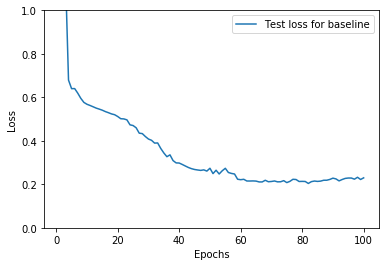

In [166]:
basezip = zip(baseline1, baseline2, baseline3, baseline4, baseline5)
base_sum = [sum(item) for item in basezip]
ave_base = [x / 5 for x in base_sum]

foldzip = zip(new_CV1, new_CV2, new_CV3, new_CV4, new_CV5)
fold_sum = [sum(item) for item in foldzip]
ave_fold = [x / 5 for x in fold_sum]

plt.plot(x1, ave_base,label='Test loss for baseline')
axes = plt.gca()
axes.set_ylim([0,1])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

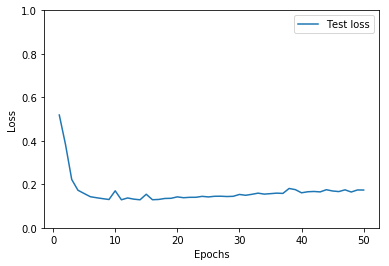

In [155]:
plt.plot(x2, ave_fold[:50],label='Test loss')
axes = plt.gca()
axes.set_ylim([0,1])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

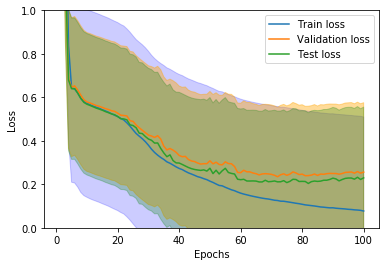

In [204]:
import math
# Validation, test and training loss for baseline
plt.plot(x1, train_ave,label='Train loss')
plt.plot(x1, test_ave,label='Validation loss')
plt.plot(x1, ave_base,label='Test loss')
axes = plt.gca()

# Plot the standard error
std_train = np.std(train_ave, axis=0)
se_train = std_train/math.sqrt(1)
tr_upper = train_ave + se_train
tr_lower = train_ave - se_train
#tr_upper = train_ave + std_train
#tr_lower = train_ave - std_train
plt.fill_between(x1, tr_lower, tr_upper, color='blue', alpha=.2)

std_test = np.std(test_ave, axis=0)
se_test = std_test/math.sqrt(1)
test_upper = test_ave + se_test
test_lower = test_ave - se_test
#test_upper = test_ave + std_test
#test_lower = test_ave - std_test
plt.fill_between(x1, test_lower, test_upper, color='orange', alpha=.4)

std_base = np.std(ave_base, axis=0)
se_base = std_base/math.sqrt(1)
base_upper = ave_base + se_base
base_lower = ave_base - se_base
# base_upper = ave_base + std_base
# base_lower = ave_base - std_base
plt.fill_between(x1, base_lower, base_upper, color='green', alpha=.25)

# Set the labels 
axes.set_ylim([0,1])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

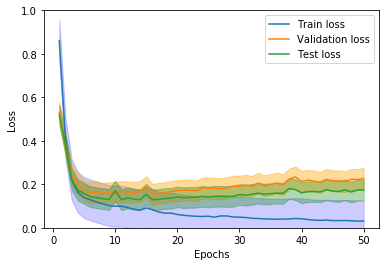

In [203]:
import math
# Validation, test and training loss for regular folds
plt.plot(x2, ave_train[:50],label='Train loss')
plt.plot(x2, ave_test[:50],label='Validation loss')
plt.plot(x2, ave_fold[:50],label='Test loss')

# Plot the standard error
std_train = np.std(ave_train, axis=0)
se_train = std_train/math.sqrt(1)
tr_upper = ave_train + se_train
tr_lower = ave_train - se_train
# tr_upper = ave_train + std_train
# tr_lower = ave_train - std_train
plt.fill_between(x2, tr_lower[:50], tr_upper[:50], color='blue', alpha=.2)

std_test = np.std(ave_test, axis=0)
se_test = std_test/math.sqrt(1)
test_upper = ave_test + se_test
test_lower = ave_test - se_test
# test_upper = ave_test + std_test
# test_lower = ave_test - std_test
plt.fill_between(x2, test_lower[:50], test_upper[:50], color='orange', alpha=.4)

std_base = np.std(ave_fold, axis=0)
se_base = std_base/math.sqrt(1)
base_upper = ave_fold + se_base
base_lower = ave_fold - se_base
# base_upper = ave_fold + std_base
# base_lower = ave_fold - std_base
plt.fill_between(x2, base_lower[:50], base_upper[:50], color='green', alpha=.3)

axes = plt.gca()
axes.set_ylim([0,1])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()